In [4]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as sts
from scipy.stats import norm
from scipy.stats import t         
from math import sqrt
import seaborn as sns 
import matplotlib.pyplot as plt

import pymysql as sql
from sqlalchemy import create_engine 

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading all the datafiles
try:
    players = pd.read_excel('players.xlsx')
    games = pd.read_excel('games.xlsx') 
    lineups = pd.read_excel('game_lineups.xlsx')
    events = pd.read_excel('game_events.xlsx')   
    appearances = pd.read_excel('appearances.xlsx')
    test_data = pd.read_excel('test data.xlsx')  
except FileNotFoundError as e:
    print(f"Error: One or more files not found: {e}")

In [6]:
games   

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,3296153,NLP,2019,Round of 16,2020-01-22,7,0,NaN,NaN,Erik ten Hag,Eric Meijers,Johan Cruijff ArenA,52017.0,Richard Martens,NaN,NaN,AFC Ajax Amsterdam,NaN,07:00:00,domestic_cup
3264,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,Thomas Thomasberg,Right to Dream Park,2843.0,Michael Tykgaard,NaN,NaN,Football Club Nords,Hobro IK,03:02:00,domestic_league
3265,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,Marc Brys,Guldensporenstadion,6143.0,Wesley Alen,NaN,NaN,Koninklijke Voetbalclub Kortrijk,Koninklijke Sint-Truidense Voetbalvereniging,03:01:00,domestic_league
3266,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,Mark Hughes,Wembley Stadium,62202.0,Roger East,NaN,NaN,Tottenham Hotspur Football Club,Stoke City,05:01:00,domestic_league


In [7]:
merged_df = appearances.copy()

merged_df = pd.merge(merged_df,games, on='game_id', how='inner')   

merged_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'competition_id_y', 'season', 'round', 'date_y',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [8]:
merged_df[["date_x","date_y"]]

,date_x,date_y
0,2012-07-13,2012-07-13
1,2012-07-14,2012-07-14
2,2012-07-15,2012-07-15
3,2012-07-19,2012-07-19
4,2012-07-22,2012-07-22
...,...,...
3563,2020-09-26,2020-09-26
3564,2020-09-26,2020-09-26
3565,2020-09-26,2020-09-26
3566,2020-09-26,2020-09-26


In [9]:
merged_df[["competition_id_x","competition_id_y"]]

,competition_id_x,competition_id_y
0,DK1,DK1
1,DK1,DK1
2,DK1,DK1
3,ELQ,ELQ
4,BESC,BESC
...,...,...
3563,BE1,BE1
3564,BE1,BE1
3565,PO1,PO1
3566,NL1,NL1


In [10]:
merged_df=merged_df.drop(["date_y","competition_id_y"],axis=1)

In [11]:
merged_df=merged_df.rename({"date_x":"date","competition_id_x":"competition_id"},axis=1)

In [12]:
merged_df = pd.merge(merged_df,events, on=['game_id','player_id'], how='inner')

In [13]:
merged_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_formation', 'away_club_formation',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date_y', 'minute', 'type', 'description',
       'player_in_id', 'player_assist_id'],
      dtype='object')

In [14]:
merged_df[["date_x","date_y"]]

,date_x,date_y
0,2012-07-14,2012-07-14
1,2012-07-19,2012-07-19
2,2012-07-22,2012-07-22
3,2012-07-22,2012-07-22
4,2012-07-23,2012-07-23
...,...,...
1117,2020-09-20,2020-09-20
1118,2020-09-26,2020-09-26
1119,2020-09-26,2020-09-26
1120,2020-09-26,2020-09-26


In [15]:
merged_df=merged_df.drop(["date_y"],axis=1)

In [16]:
merged_df=merged_df.rename({"date_x":"date"},axis=1)

In [17]:
merged_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_formation', 'away_club_formation',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'minute', 'type', 'description', 'player_in_id',
       'player_assist_id'],
      dtype='object')

In [18]:
merged_df = pd.merge(merged_df, lineups, on='player_id', how='inner')

In [19]:
merged_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'date', 'player_name_x',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_formation', 'away_club_formation',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'minute', 'type_x', 'description', 'player_in_id',
       'player_assist_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'player_name_y', 'team_captain', 'position'],
      dtype='object')

In [20]:
merged_df[["game_id_x","game_id_y"]]

,game_id_x,game_id_y
0,2231426,4096025
1,2231426,4096042
2,2231426,4096061
3,2231426,4162615
4,2231426,4162639
...,...,...
3632,3415291,4120867
3633,3415291,4150507
3634,3415291,4150562
3635,3415291,4150625


In [21]:
merged_df[["player_name_x","player_name_y"]]

,player_name_x,player_name_y
0,Timothy Chandler,Timothy Chandler
1,Timothy Chandler,Timothy Chandler
2,Timothy Chandler,Timothy Chandler
3,Timothy Chandler,Timothy Chandler
4,Timothy Chandler,Timothy Chandler
...,...,...
3632,Joseph Efford,Joseph Efford
3633,Joseph Efford,Joseph Efford
3634,Joseph Efford,Joseph Efford
3635,Joseph Efford,Joseph Efford


In [22]:
merged_df=pd.merge(merged_df,players,on="player_id",how="inner")

In [23]:
merged_df["contract_expiration_date"].dtype

dtype('<M8[ns]')

In [24]:
merged_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'date', 'player_name_x',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_formation', 'away_club_formation',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'minute', 'type_x', 'description', 'player_in_id',
       'player_assist_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'player_name_y', 'team_captain', 'position_x', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'position_y', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='

In [25]:
merged_df=merged_df.drop(["player_name_y"],axis=1)
merged_df=merged_df.rename({"player_name_x":"player_name"},axis=1)

In [26]:
merged_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_formation', 'away_club_formation',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'minute', 'type_x', 'description', 'player_in_id',
       'player_assist_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

In [27]:
merged_df[["position_x","position_y"]]

,position_x,position_y
0,Right-Back,Defender
1,Right-Back,Defender
2,Right-Back,Defender
3,Right-Back,Defender
4,Right-Back,Defender
...,...,...
3632,Centre-Forward,Attack
3633,Centre-Forward,Attack
3634,Centre-Forward,Attack
3635,Centre-Forward,Attack


In [28]:
# Missing value treatment
merged_df.isnull().sum()

appearance_id                     0
game_id_x                         0
player_id                         0
date                              0
player_name                       0
competition_id                    0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
season                            0
round                             0
home_club_goals                   0
away_club_goals                   0
home_club_position              677
away_club_position              677
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                      324
referee                          22
home_club_formation            3637
away_club_formation            3637
home_club_name                  198
away_club_name                   22
aggregate                         0
competition_type            

In [29]:
merged_df=merged_df.drop(["home_club_formation","away_club_formation","player_assist_id"],axis=1)

In [30]:
merged_df.isnull().sum()

appearance_id                     0
game_id_x                         0
player_id                         0
date                              0
player_name                       0
competition_id                    0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
season                            0
round                             0
home_club_goals                   0
away_club_goals                   0
home_club_position              677
away_club_position              677
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                      324
referee                          22
home_club_name                  198
away_club_name                   22
aggregate                         0
competition_type                  0
game_event_id                     0
minute                      

In [31]:
merged_df["contract_expiration_date"]=merged_df["contract_expiration_date"].astype("object")

In [32]:
n=merged_df.select_dtypes(exclude="object") # numerics
c=merged_df.select_dtypes(include="object") #objects
c.columns

Index(['appearance_id', 'player_name', 'competition_id', 'round',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'referee', 'home_club_name', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'type_x', 'description',
       'game_lineups_id', 'type_y', 'position_x', 'name', 'player_code',
       'country_of_birth', 'sub_position', 'position_y', 'foot',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

In [33]:
merged_df.dtypes

appearance_id                          object
game_id_x                               int64
player_id                               int64
date                           datetime64[ns]
player_name                            object
competition_id                         object
yellow_cards                            int64
red_cards                               int64
goals                                   int64
assists                                 int64
minutes_played                          int64
season                                  int64
round                                  object
home_club_goals                         int64
away_club_goals                         int64
home_club_position                    float64
away_club_position                    float64
home_club_manager_name                 object
away_club_manager_name                 object
stadium                                object
attendance                            float64
referee                           

In [34]:
for i in n.columns:
    merged_df[i]=merged_df[i].fillna(merged_df[i].mean()) #treating the missing value for numeric columns
for j in c.columns:
    merged_df[j]=merged_df[j].fillna(merged_df[j].mode()[0]) #treating the missing value for object columns

In [35]:
merged_df["contract_expiration_date"].value_counts()

contract_expiration_date
2027-06-30    1532
2024-06-30    1211
2025-06-30     714
2028-06-30     110
2026-06-30      70
Name: count, dtype: int64

In [36]:
merged_df.isnull().sum() 

appearance_id                  0
game_id_x                      0
player_id                      0
date                           0
player_name                    0
competition_id                 0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
game_event_id                  0
minute                         0
type_x                         0
description                    0
player_in_

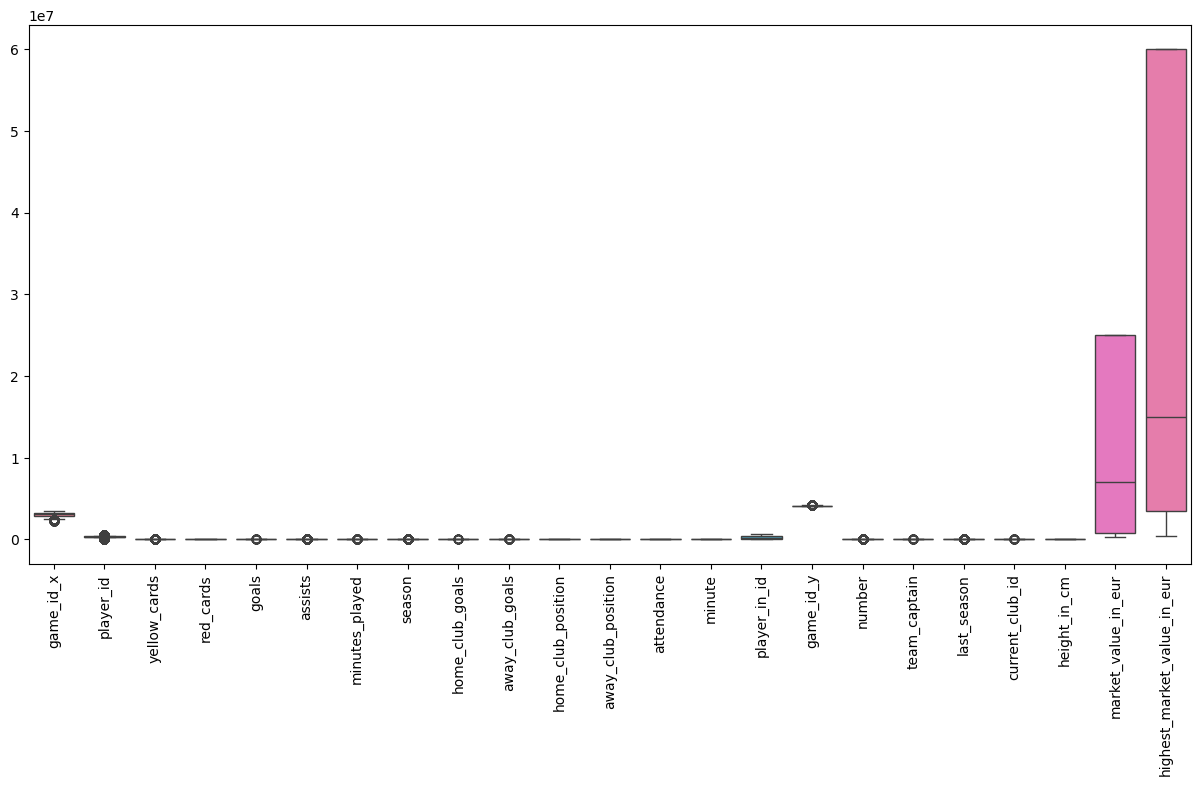

In [37]:
#outlier analysis
sns.boxplot(data=n)
plt.gcf().set_size_inches(15,7)
plt.xticks(rotation=90)
plt.show()

In [29]:
#Converting the cleaned dataset into excel
merged_df.to_csv("Football data.csv",index=False)

In [30]:
#pushing datafile into sql database

In [31]:
Db = sql.connect(host = 'localhost', user = 'root', password = 'Ahilan465$11573', database = 'project')
mycursor=Db.cursor()

In [32]:
hostname='localhost'
dbname='project'
uname='root'
pwd = 'Ahilan465$11573'

engine= create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
        .format(host=hostname,db=dbname,user=uname,pw=pwd))

In [ ]:
merged_df.to_sql("Football_data",engine,index=False)

## two business questions for each focus area:

- Performance Analysis:

How can we identify specific areas of on-field weakness (e.g., passing, shooting, defending) through data analysis?
Which players are underperforming relative to their expected contribution based on data-driven benchmarks?
Player Profile and Market Value:

What are the most important attributes and skills that drive a player's market value?
Can we build a model to predict player market value with greater accuracy than current methods?
- Team Comparison:

Which key performance indicators (KPIs) reveal where our team excels or lags compared to our competitors?
How can we identify tactical or strategic advantages that other teams employ successfully?
Attendance and Stadium Analysis:

What factors are most strongly correlated with fluctuations in match attendance?
Can we segment our fan base based on demographics and preferences to target marketing efforts?
- Referee Analysis:

Do referees show any statistically significant biases in their calls related to teams, players, or match outcomes?
How can we use data to objectively evaluate referee performance and identify areas for improvement in officiating?
Substitution Patterns:

At what points in a match are substitutions most effective in changing the game's outcome?
Which players have the greatest positive impact when used as substitutes in specific tactical situations?
Event Analysis:

What common patterns of play lead to goals being scored or conceded?
Can we identify individual player contributions to key events like goals, assists, and turnovers?
- Competition Analysis:

What are the typical playing styles and tactical approaches of our upcoming opponents?
How can we use opponent data to prepare our team to exploit their weaknesses and neutralize their strengths?
- Player Attributes and Demographics:

Which player attributes (physical, technical, mental) are most predictive of success in specific positions?
Are there any demographic trends or patterns that correlate with player performance or potential?
- Contract Management:

How can we objectively assess a player's fair market value for contract negotiations?
Can we forecast player performance and potential future value to inform long-term contract decisions?

In [382]:
#descriptive analysis function
def statistical_analysis(df, column1,):
    results = {}
    results['mean'] = df[column1].mean()
    results['median'] = df[column1].median()
    results['std_dev'] = df[column1].std()
    results['variance'] = df[column1].var()
    results['skewness'] = df[column1].skew()
    results['kurtosis'] = df[column1].kurtosis()
    return results

## Descriptive analysis


In [35]:
# 1. Average, Median, Standard Deviation of Goals
print("Descriptive Statistics for Goals")
print(statistical_analysis(merged_df,'goals'))

Descriptive Statistics for Goals
{'mean': 0.4825405554028045, 'median': 0.0, 'std_dev': 0.6125164341362038, 'variance': 0.37517638208693055, 'skewness': 1.1873983911407466, 'kurtosis': 1.7769911233052618}


In [36]:
# 4. Goals and Assists by Position
position_stats = merged_df.groupby('position_x')[['goals', 'assists']].mean()
print(position_stats)

                       goals   assists
position_x                            
Attacking Midfield  0.630000  0.290000
Central Midfield    0.225989  0.112994
Centre-Back         0.333333  0.000000
Centre-Forward      0.526055  0.168734
Defensive Midfield  0.178571  0.000000
Left Winger         0.527508  0.203883
Left-Back           0.606742  0.258427
Right Midfield      0.389068  0.086817
Right Winger        0.554813  0.179813
Right-Back          0.428044  0.081181


In [37]:
# Average Performance per Team
team_performance = merged_df.groupby('home_club_name')[['goals', 'assists', 'minutes_played']].mean()
print(team_performance.sort_values(by='goals', ascending=False).head(5))

                                goals  assists  minutes_played
home_club_name                                                
Burnley Football Club             3.0      0.0            90.0
Royal Sporting Club Anderlecht    1.0      0.0            90.0
FC Girondins Bordeaux             1.0      0.0            22.0
FC Ingolstadt 04                  1.0      1.0            45.0
Feyenoord Rotterdam               1.0      0.0            86.0


# Performance analysis

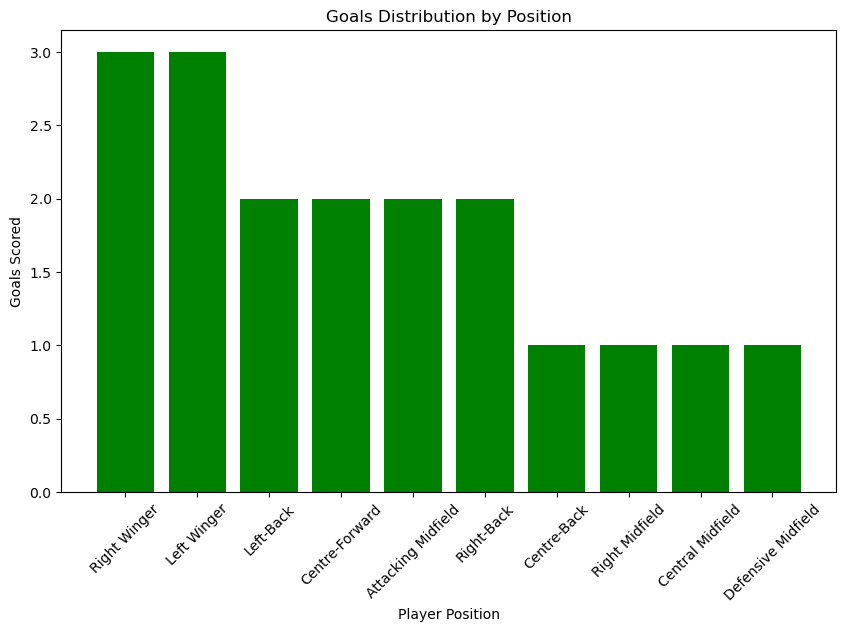

In [38]:
# 1. Performance by Position
plt.figure(figsize=(10, 6))
p=merged_df.sort_values("goals",ascending=False)
plt.bar(p['position_x'],p["goals"],color="g")
plt.title('Goals Distribution by Position')
plt.xlabel('Player Position')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)  
plt.show()

## Right wingers have scored the most goals comared to other positions

In [39]:
# 4. Which team has the highest average goals scored?
avg_goals = merged_df.groupby('home_club_name')['goals'].mean().sort_values(ascending=False)
print("Average gols scored by clubs")
print("---------------------------------------")
print(avg_goals.head(10))

Average gols scored by clubs
---------------------------------------
home_club_name
Burnley Football Club             3.0
Royal Sporting Club Anderlecht    1.0
FC Girondins Bordeaux             1.0
FC Ingolstadt 04                  1.0
Feyenoord Rotterdam               1.0
Beerschot V.A.                    1.0
Toulouse Football Club            1.0
Vejle Boldklub                    1.0
Aston Villa Football Club         1.0
Arsenal Football Club             1.0
Name: goals, dtype: float64


## Sprint 3

In [42]:
# Probabilities
#What is the probability that player from Italy scores a goal
fil1=merged_df[merged_df['country_of_birth']=='Italy']
p1=100*len(fil1)/len(merged_df)
print(f'The probabilty of player from Italy scoring goal is {round(p1)}%')

The probabilty of player from Italy scoring goal is 11%


In [41]:

#1. Conditional Probability
#Question:
#What is the probability that a player scores a goal given that they have played at least 60 minutes?

df_filtered = merged_df[merged_df['minutes_played'] >= 60]

# Probability of scoring at least one goal given that they played 60+ minutes
p= (df_filtered['goals'] > 0).mean()  

print(f"Probability of scoring at least one goal when playing 60+ minutes: {p:.2f}")


Probability of scoring at least one goal when playing 60+ minutes: 0.46


In [ ]:
merged_df.columns

In [43]:
#2. Joint Probability
#Question:
#What is the probability that a randomly selected player has received both a yellow card and scored a goal in a match?
prob_yellow = (merged_df['yellow_cards'] > 0).mean()  # P(Yellow Card)
prob_goal = (merged_df['goals'] > 0).mean()  # P(Goal)
prob_both = ((merged_df['yellow_cards'] > 0) & (merged_df['goals'] > 0)).mean()  # P(Yellow Card and Goal) 
print(f"Probability of a player having both a yellow card and scoring a goal: {prob_both:.2f}")

Probability of a player having both a yellow card and scoring a goal: 0.07


In [44]:
#Sampling techqiues
# 1. Simple Random Sampling

n = 100  # Number of samples to take
simple_random_sample = merged_df.sample(n=n, random_state=2)  # random_state for reproducibility
print("\nSimple Random Sample:")
pd.DataFrame(simple_random_sample)



Simple Random Sample:


,appearance_id,game_id_x,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
2857,3219361_315779,3219361,315779,2019-11-02,Christian Pulisic,GB1,0,0,1,0,...,United States,1998-09-18,Right Winger,Attack,right,177.0,25000000.0,60000000.0,2027-06-30,Wasserman
3323,3219138_315779,3219138,315779,2020-06-21,Christian Pulisic,GB1,0,0,1,0,...,United States,1998-09-18,Right Winger,Attack,right,177.0,25000000.0,60000000.0,2027-06-30,Wasserman
1797,3058462_315779,3058462,315779,2018-09-29,Christian Pulisic,L1,0,0,0,0,...,United States,1998-09-18,Right Winger,Attack,right,177.0,25000000.0,60000000.0,2027-06-30,Wasserman
2251,3047758_355369,3047758,355369,2019-02-10,Jordan,FR1,0,0,0,0,...,United States,1996-04-26,Centre-Forward,Attack,right,191.0,7000000.0,10000000.0,2024-06-30,Gestifute
338,2586806_355369,2586806,355369,2015-09-12,Jordan,FR1,0,0,1,0,...,United States,1996-04-26,Centre-Forward,Attack,right,191.0,7000000.0,10000000.0,2024-06-30,Gestifute
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,3106429_542776,3106429,542776,2018-09-26,Jonathan Amon,DKP,0,0,1,0,...,United States,1999-04-30,Left Winger,Attack,right,175.0,300000.0,700000.0,2024-06-30,Wasserman
3474,3401687_315779,3401687,315779,2020-08-01,Christian Pulisic,FAC,0,0,1,0,...,United States,1998-09-18,Right Winger,Attack,right,177.0,25000000.0,60000000.0,2027-06-30,Wasserman
1455,3047699_370846,3047699,370846,2018-08-04,Timothy Weah,FRCH,0,0,1,0,...,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
418,2636829_124732,2636829,124732,2015-12-16,John Anthony Brooks,DFB,0,0,1,0,...,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON


In [45]:
# Clustered sampling
clust_sample=[]
group=merged_df.groupby('competition_type')
cup=['domestic_cup','international_cup']
for c in cup:
    get_grp=group.get_group(c)
    cl_data=get_grp.sample(n=100,random_state=1)
    clust_sample.append(cl_data)
clust_sample=pd.concat(clust_sample,ignore_index=True)

clust_sample 

,appearance_id,game_id_x,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,3106429_542776,3106429,542776,2018-09-26,Jonathan Amon,DKP,0,0,1,0,...,United States,1999-04-30,Left Winger,Attack,right,175.0,300000.0,700000.0,2024-06-30,Wasserman
1,3106429_542776,3106429,542776,2018-09-26,Jonathan Amon,DKP,0,0,1,0,...,United States,1999-04-30,Left Winger,Attack,right,175.0,300000.0,700000.0,2024-06-30,Wasserman
2,2864739_332697,2864739,332697,2017-08-14,Weston McKennie,DFB,0,0,0,0,...,United States,1998-08-28,Central Midfield,Midfield,right,185.0,20000000.0,25000000.0,2025-06-30,Wasserman
3,3401687_315779,3401687,315779,2020-08-01,Christian Pulisic,FAC,0,0,1,0,...,United States,1998-09-18,Right Winger,Attack,right,177.0,25000000.0,60000000.0,2027-06-30,Wasserman
4,3401687_315779,3401687,315779,2020-08-01,Christian Pulisic,FAC,0,0,1,0,...,United States,1998-09-18,Right Winger,Attack,right,177.0,25000000.0,60000000.0,2027-06-30,Wasserman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2805647_315779,2805647,315779,2017-03-08,Christian Pulisic,CL,0,0,1,1,...,United States,1998-09-18,Right Winger,Attack,right,177.0,25000000.0,60000000.0,2027-06-30,Wasserman
196,3098011_315779,3098011,315779,2018-11-06,Christian Pulisic,CL,0,0,0,0,...,United States,1998-09-18,Right Winger,Attack,right,177.0,25000000.0,60000000.0,2027-06-30,Wasserman
197,3098734_355369,3098734,355369,2018-11-08,Jordan,EL,0,0,1,0,...,United States,1996-04-26,Centre-Forward,Attack,right,191.0,7000000.0,10000000.0,2024-06-30,Gestifute
198,2982088_315779,2982088,315779,2018-02-22,Christian Pulisic,EL,0,0,0,0,...,United States,1998-09-18,Right Winger,Attack,right,177.0,25000000.0,60000000.0,2027-06-30,Wasserman


In [46]:
# 4. Systematic Sampling

k = 10  # Sample every kth row

systematic_sample = merged_df.iloc[::k]  # Start from the first row and take every kth row
print("\nSystematic Sample:")
pd.DataFrame(systematic_sample.head())  


Systematic Sample:


,appearance_id,game_id_x,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,2012-09-21,Timothy Chandler,L1,0,0,0,0,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
10,2231400_49723,2231400,49723,2012-09-26,Timothy Chandler,L1,0,0,1,0,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
20,2231496_49723,2231496,49723,2012-11-03,Timothy Chandler,L1,1,0,0,1,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
30,2231441_49723,2231441,49723,2012-11-28,Timothy Chandler,L1,0,0,0,0,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
40,2231518_49723,2231518,49723,2012-12-16,Timothy Chandler,L1,1,0,0,0,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman


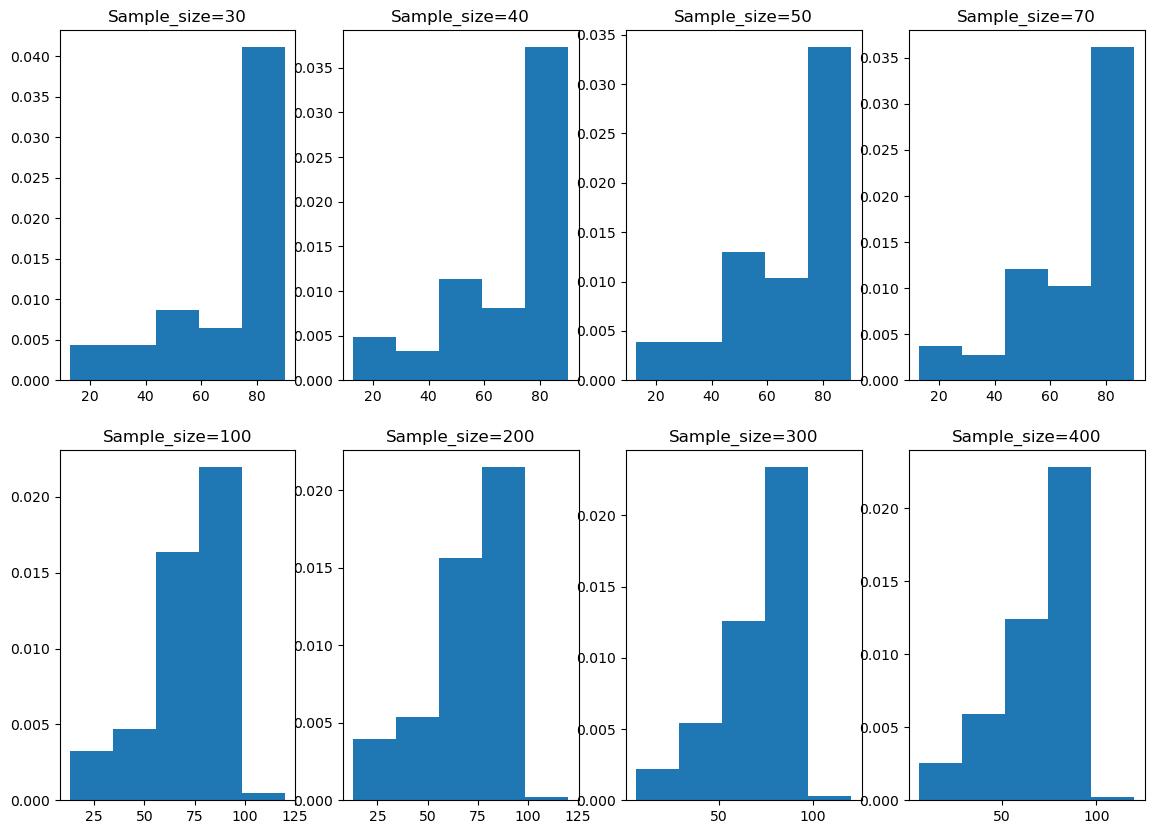

In [47]:
#central limit theorem
num=[30,40,50,70,100,200,300,400]
data_s=[]
sample_df=pd.DataFrame

fig,ax=plt.subplots(2,4, figsize=(14,10))
for i in num:
    sample_df= merged_df.sample(n=i,replace=True,random_state=1)
    data_s.append(sample_df["minutes_played"].tolist())

k=0 #(count)
for i in range(0,2):
    for j in range(0,4):
        ax[i,j].hist(data_s[k],5,density=True) # 5 is bin size
        ax[i,j].set_title(label="Sample_size="+str(len(data_s[k])))
        k=k+1
plt.show()  

In [52]:
#Sample Statistics:
#TSample size of 100 reps almost a normal distribution so lets consider it

mean=st.mean(data_s[4])
median=st.median(data_s[4])
sd=st.stdev(data_s[4])

print("Sample mean is:",mean )
print("Sample median is:",median)
print("Sample Standard deviation  is:",sd)
print("Sample skewness is:",sts.skew(data_s[4],bias=False))
print("Sample kurtosis is:",sts.kurtosis(data_s[4],bias=False))

Sample mean is: 71.16
Sample median is: 76.0
Sample Standard deviation  is: 19.96852068085711
Sample skewness is: -0.8885073070410962
Sample kurtosis is: 0.5973255858105961


In [49]:
#Population parameters
import statistics as st
import scipy.stats as sts

data_p=merged_df["minutes_played"].tolist()

p_mean=st.mean(data_p)
p_median=st.median(data_p)
p_sd=st.stdev(data_p)

print("Population mean is:", p_mean)
print("Population median is:", p_median)
print("Population Standard deviation  is:", p_sd)
print("Population skewness is:",sts.skew(data_p,bias=False))
print("Population kurtosis is:",sts.kurtosis(data_p,bias=False))

Population mean is: 70.0093483640363
Population median is: 75
Population Standard deviation  is: 20.993278313932603
Population skewness is: -0.9636448787454817
Population kurtosis is: 0.6048337351314137


#### Interpretation:
Noted that mean ~ median ,s kurt`
for both sample and population
which implies that both are normally distributed 

Note:  in our eg population mean=70.009 and sample mean=71.16 
so samplemean is near around popl mean

All of the above are nearly equal so this proving the central limit theorem

In [51]:
sm=[]
sn=sample_df.columns

for i in sn:
    sm.append(sample_df[i].mean())
mean_d=pd.DataFrame(sm,index=sn,columns=["Mean"])
mean_d

,Mean
sample_0,70.950
sample_1,69.975
sample_2,71.400
sample_3,73.575
sample_4,70.125
sample_5,73.825
sample_6,67.600
sample_7,70.375
sample_8,68.825
sample_9,69.500


In [53]:
#standard deviation
st.stdev(mean_d["Mean"])

3.5525220377849003

In [54]:
#calculate sample standard deviation from population parameter
import math as m
calculated_sd= p_sd/m.sqrt(40)
calculated_sd

3.319328751292318

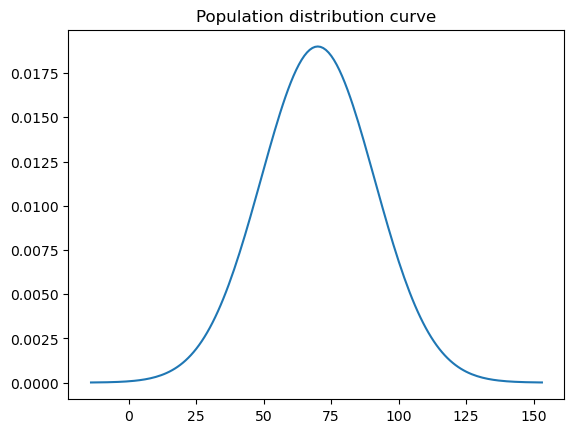

In [55]:
from scipy.stats import norm
lower_p=p_mean-4*p_sd
upper_p=p_mean+4*p_sd
norm_p=np.arange(lower_p,upper_p)
plt.plot(norm_p,norm.pdf(norm_p,p_mean,p_sd))
plt.title("Population distribution curve")
plt.show()

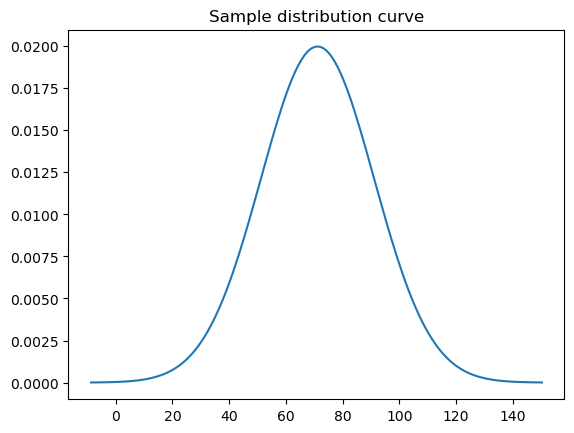

In [56]:
lower_p=mean-4*sd
upper_p=mean+4*sd
norm_p=np.arange(lower_p,upper_p)
plt.plot(norm_p,norm.pdf(norm_p,mean,sd))
plt.title("Sample distribution curve")
plt.show()

 #### both sample mean and the poulation mean are same also the standard deviation of samples is equal to the calculated sample standard deviation from population parameter .Hence it proves the central limit theorem

# Performance analysis

# Logistic Regression

### predict whether a player will score a goal in a game based on their past performance statistics

In [656]:
merged_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y',
       'number', 'team_captain', 'position_x', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'position_y', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name', 'competition_type_enc',
       'goal'],
      dtype='object')

In [619]:
merged_df["goals"].unique()

array([0, 1, 2, 3], dtype=int64)

In [623]:
df=merged_df
df.loc[df['goals']<1,'goal']=0
df.loc[df['goals']>=1,'goal']=1

In [634]:
a=df[["goal"]].astype('int64')
a["goal"].unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
3632    1
3633    1
3634    1
3635    1
3636    1
Name: goal, Length: 3637, dtype: int64>

In [635]:
df=merged_df[[ 'assists', 'minutes_played', 'foot','position_x','yellow_cards','red_cards'
]]

In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   assists         3637 non-null   int64 
 1   minutes_played  3637 non-null   int64 
 2   foot            3637 non-null   object
 3   position_x      3637 non-null   object
 4   yellow_cards    3637 non-null   int64 
 5   red_cards       3637 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 170.6+ KB


In [640]:
cat=df.select_dtypes(include='object')
for col in cat.columns:
    label_encod=preprocessing.LabelEncoder()
    df[col+'_enc']=label_encod.fit_transform(df[col])
col_drop=df.select_dtypes(include='object')
df=df.drop(col_drop,axis=1)
df 

,assists,minutes_played,yellow_cards,red_cards,foot_enc,position_x_enc
0,0,70,0,0,2,9
1,0,70,0,0,2,9
2,0,70,0,0,2,9
3,0,70,0,0,2,9
4,0,70,0,0,2,9
...,...,...,...,...,...,...
3632,0,77,0,0,2,3
3633,0,77,0,0,2,3
3634,0,77,0,0,2,3
3635,0,77,0,0,2,3


In [644]:
 # Standardizing data together
cols=df.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled 

array([[-3.84674000e-01, -4.45363956e-04, -4.27509330e-01,
         0.00000000e+00,  4.31976787e-01,  1.15814165e+00],
       [-3.84674000e-01, -4.45363956e-04, -4.27509330e-01,
         0.00000000e+00,  4.31976787e-01,  1.15814165e+00],
       [-3.84674000e-01, -4.45363956e-04, -4.27509330e-01,
         0.00000000e+00,  4.31976787e-01,  1.15814165e+00],
       ...,
       [-3.84674000e-01,  3.33040546e-01, -4.27509330e-01,
         0.00000000e+00,  4.31976787e-01, -1.00823647e+00],
       [-3.84674000e-01,  3.33040546e-01, -4.27509330e-01,
         0.00000000e+00,  4.31976787e-01, -1.00823647e+00],
       [-3.84674000e-01,  3.33040546e-01, -4.27509330e-01,
         0.00000000e+00,  4.31976787e-01, -1.00823647e+00]])

In [645]:
df_scaled=pd.DataFrame(df_scaled,columns=cols)
df_scaled

,assists,minutes_played,yellow_cards,red_cards,foot_enc,position_x_enc
0,-0.384674,-0.000445,-0.427509,0.0,0.431977,1.158142
1,-0.384674,-0.000445,-0.427509,0.0,0.431977,1.158142
2,-0.384674,-0.000445,-0.427509,0.0,0.431977,1.158142
3,-0.384674,-0.000445,-0.427509,0.0,0.431977,1.158142
4,-0.384674,-0.000445,-0.427509,0.0,0.431977,1.158142
...,...,...,...,...,...,...
3632,-0.384674,0.333041,-0.427509,0.0,0.431977,-1.008236
3633,-0.384674,0.333041,-0.427509,0.0,0.431977,-1.008236
3634,-0.384674,0.333041,-0.427509,0.0,0.431977,-1.008236
3635,-0.384674,0.333041,-0.427509,0.0,0.431977,-1.008236


In [646]:
df_scaled=pd.concat([df_scaled,a],axis=1)

<Axes: >

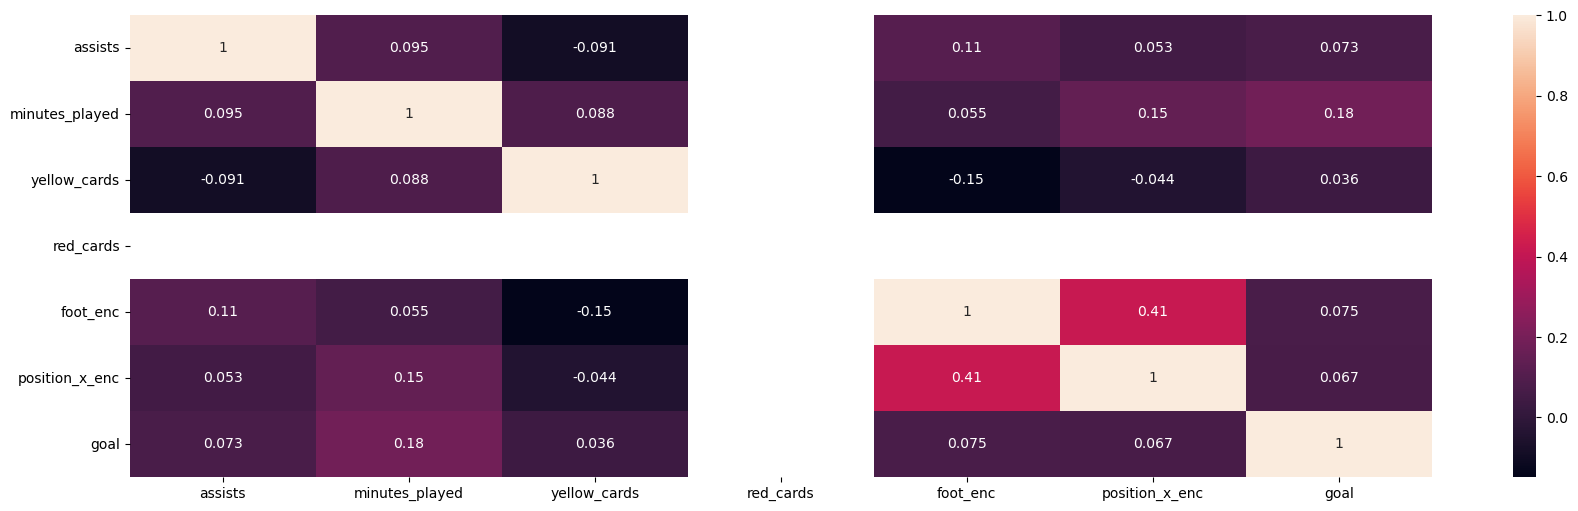

In [647]:
# Plotting heatmap
fig,ax=plt.subplots(1,1,figsize=(21,6))
sns.heatmap(df_scaled.corr(),annot=True)

In [648]:
train,test=train_test_split(df_scaled,train_size=0.8,random_state=200)

In [649]:
X_train=train.drop(columns="goal",axis=1)
y_train=train["goal"]
X_test=test.drop(columns="goal",axis=1)
y_test=test["goal"]

In [650]:
X_train

,assists,minutes_played,yellow_cards,red_cards,foot_enc,position_x_enc
2584,2.300661,0.190118,-0.427509,0.0,0.431977,0.797079
463,-0.384674,-1.191466,-0.427509,0.0,0.431977,0.797079
3135,-0.384674,0.952372,-0.427509,0.0,0.431977,1.158142
3333,-0.384674,0.952372,-0.427509,0.0,0.431977,0.797079
2635,-0.384674,0.571245,2.339130,0.0,0.431977,0.797079
...,...,...,...,...,...,...
2858,-0.384674,0.618886,-0.427509,0.0,0.431977,0.797079
1860,-0.384674,0.428322,-0.427509,0.0,0.431977,-1.730363
784,-0.384674,0.571245,-0.427509,0.0,0.431977,0.797079
617,2.300661,-1.191466,-0.427509,0.0,0.431977,0.797079


In [651]:
logreg=LogisticRegression().fit(X_train,y_train)

# Using the trained model to predict the outcome of the X_Test dataset
ypred=logreg.predict(X_test)
ypred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [652]:
#confusion matrics
print(confusion_matrix(y_test,ypred))

[[335  77]
 [175 141]]


In [ ]:
True Negatives (TN): 335 (Correctly predicted negative cases)
False Positives (FP): 77 (Incorrectly predicted positive cases 
False Negatives (FN): 175 (Incorrectly predicted negative cases 
True Positives (TP): 141 (Correctly predicted positive cases)

In [653]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
print("recall score:",recall_score(y_test,ypred,average='macro')) #recall=Tp/(Tp+FN)
print("f1 score:",f1_score(y_test,ypred,average='macro')) #harmonic mean of precision and recall          
print("accuracy score:",accuracy_score(y_test,ypred)) #accuracy= no of correct result/total no of result
print("precision score:",precision_score(y_test,ypred,average='macro')) #precision =Tp/(TP+FP)

recall score: 0.6296546638810372
f1 score: 0.6273855078115479
accuracy score: 0.6538461538461539
precision score: 0.6518258679618636


In [654]:
# ROC curve
from sklearn.metrics import roc_auc_score as r
roc=r(y_test,logreg.predict_proba(X_test)[:,1])
roc  #reciver operating characteristics

0.6489415632296915

<Figure size 1000x100 with 0 Axes>

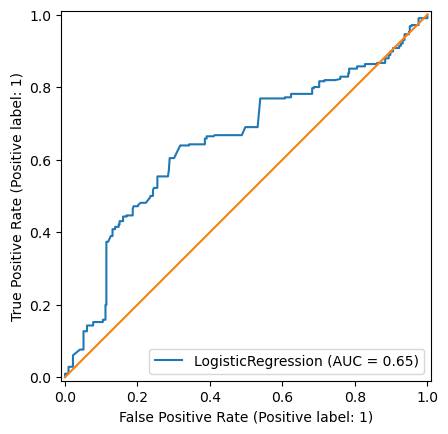

In [655]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(10,1))
RocCurveDisplay.from_estimator(logreg,X_test,y_test)
plt.plot([0,1],[0,1]) 

### overall performance:
#### Interpretations:
Overall Interpretation:

Recall Score (0.62):
Recall measures how well the model identifies actual positive cases. With a recall score of 0.051, the model captures only 5.1% of the actual positives, which indicates a poor performance in identifying positives.

Precision Score (0.65):
Precision measures the proportion of correctly predicted positives out of all predicted positives. A precision score of 1.0 indicates that every positive prediction made by the model was correct. However, this high precision may be due to the low number of positive predictions.

Accuracy Score (0.65):
The accuracy score of 84.75% reflects the overall proportion of correct predictions out of all predictions. This suggests that the model performs well in terms of overall classification accuracy.

F1 Score (0.62):
The F1 score, which is the harmonic mean of precision and recall, is 0.62. This very low score indicates a modreate balance between precision and recall..
    

## Business questions

performed in tableau

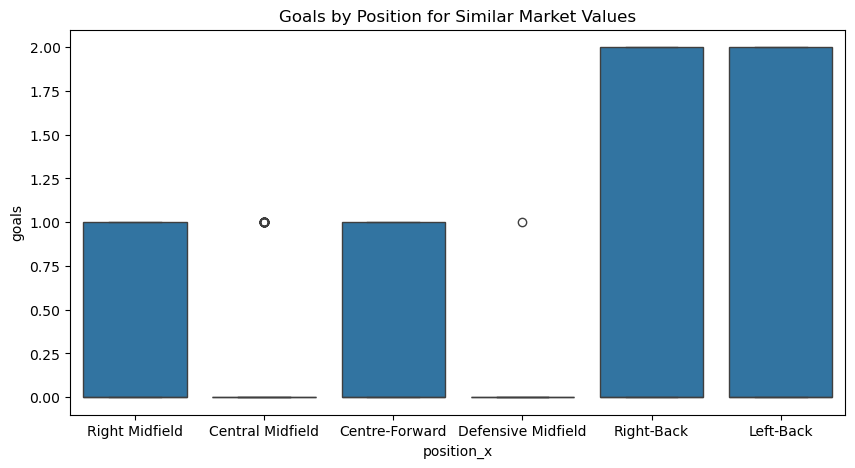

In [80]:
#How do performance metrics differ for players with similar market values but different positions?**

similar_values = merged_df[merged_df['market_value_in_eur'].between(10000000, 20000000)]
plt.figure(figsize=(10,5))
sns.boxplot(x='position_x', y='goals', data=similar_values)
plt.title('Goals by Position for Similar Market Values')
plt.show()

In [81]:
#*How does player performance correlate with contract expiration dates?**
merged_df['contract_year'] = pd.to_datetime(merged_df['contract_expiration_date']).dt.year
performance_by_year = merged_df.groupby('contract_year')['goals'].mean()
performance_by_year
#Players performance tend to flucktuate during their contract expiration dates

contract_year
2024    0.451693
2025    0.348739
2026    0.463415
2027    0.559211
2028    0.645455
Name: goals, dtype: float64

# Player profile and market value
### Linear regression

### Can we predict a player s market value in euros based on their performance metrics (e.g., goals, assists, and age) using a regression model?

In [77]:
#Linear regression
df=merged_df[['goals','assists','yellow_cards','home_club_name', 'away_club_name','minutes_played','market_value_in_eur','team_captain','foot','height_in_cm','stadium','attendance']]
df

,goals,assists,yellow_cards,home_club_name,away_club_name,minutes_played,market_value_in_eur,team_captain,foot,height_in_cm,stadium,attendance
0,0,0,0,1.FC Nuremberg,eintracht frankfurt Football ag,70,700000.0,0,right,186.0,Max-Morlock-Stadion,45033.0
1,0,0,0,1.FC Nuremberg,eintracht frankfurt Football ag,70,700000.0,0,right,186.0,Max-Morlock-Stadion,45033.0
2,0,0,0,1.FC Nuremberg,eintracht frankfurt Football ag,70,700000.0,0,right,186.0,Max-Morlock-Stadion,45033.0
3,0,0,0,1.FC Nuremberg,eintracht frankfurt Football ag,70,700000.0,0,right,186.0,Max-Morlock-Stadion,45033.0
4,0,0,0,1.FC Nuremberg,eintracht frankfurt Football ag,70,700000.0,0,right,186.0,Max-Morlock-Stadion,45033.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3632,1,0,0,Beerschot V.A.,SK Beveren,77,300000.0,0,right,176.0,Olympisch Stadion,3200.0
3633,1,0,0,Beerschot V.A.,SK Beveren,77,300000.0,0,right,176.0,Olympisch Stadion,3200.0
3634,1,0,0,Beerschot V.A.,SK Beveren,77,300000.0,0,right,176.0,Olympisch Stadion,3200.0
3635,1,0,0,Beerschot V.A.,SK Beveren,77,300000.0,0,right,176.0,Olympisch Stadion,3200.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   goals                3637 non-null   int64  
 1   assists              3637 non-null   int64  
 2   yellow_cards         3637 non-null   int64  
 3   home_club_name       3637 non-null   object 
 4   away_club_name       3637 non-null   object 
 5   minutes_played       3637 non-null   int64  
 6   market_value_in_eur  3637 non-null   float64
 7   team_captain         3637 non-null   int64  
 8   foot                 3637 non-null   object 
 9   height_in_cm         3637 non-null   float64
 10  stadium              3637 non-null   object 
 11  attendance           3637 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 341.1+ KB


In [79]:
# Feature Engineering
cat=df.select_dtypes(include='object')
for col in cat.columns:
    label_encod=preprocessing.LabelEncoder()
    df[col+'_enc']=label_encod.fit_transform(df[col])
col_drop=df.select_dtypes(include='object')
df=df.drop(col_drop,axis=1)
df

,goals,assists,yellow_cards,minutes_played,market_value_in_eur,team_captain,height_in_cm,attendance,home_club_name_enc,away_club_name_enc,foot_enc,stadium_enc
0,0,0,0,70,700000.0,0,186.0,45033.0,3,101,2,60
1,0,0,0,70,700000.0,0,186.0,45033.0,3,101,2,60
2,0,0,0,70,700000.0,0,186.0,45033.0,3,101,2,60
3,0,0,0,70,700000.0,0,186.0,45033.0,3,101,2,60
4,0,0,0,70,700000.0,0,186.0,45033.0,3,101,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...
3632,1,0,0,77,300000.0,0,176.0,3200.0,16,74,2,71
3633,1,0,0,77,300000.0,0,176.0,3200.0,16,74,2,71
3634,1,0,0,77,300000.0,0,176.0,3200.0,16,74,2,71
3635,1,0,0,77,300000.0,0,176.0,3200.0,16,74,2,71


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   goals                3637 non-null   int64  
 1   assists              3637 non-null   int64  
 2   yellow_cards         3637 non-null   int64  
 3   minutes_played       3637 non-null   int64  
 4   market_value_in_eur  3637 non-null   float64
 5   team_captain         3637 non-null   int64  
 6   height_in_cm         3637 non-null   float64
 7   attendance           3637 non-null   float64
 8   home_club_name_enc   3637 non-null   int32  
 9   away_club_name_enc   3637 non-null   int32  
 10  foot_enc             3637 non-null   int32  
 11  stadium_enc          3637 non-null   int32  
dtypes: float64(3), int32(4), int64(5)
memory usage: 284.3 KB


In [81]:
# Data scaling
col=df.columns
scale=StandardScaler()
df_scl=scale.fit_transform(df)
df_scaled=pd.DataFrame(df_scl,columns=col)

In [82]:
df_scaled

,goals,assists,yellow_cards,minutes_played,market_value_in_eur,team_captain,height_in_cm,attendance,home_club_name_enc,away_club_name_enc,foot_enc,stadium_enc
0,-0.787909,-0.384674,-0.427509,-0.000445,-1.004958,-0.111928,0.679979,0.518152,-1.388311,1.737300,0.431977,-0.266935
1,-0.787909,-0.384674,-0.427509,-0.000445,-1.004958,-0.111928,0.679979,0.518152,-1.388311,1.737300,0.431977,-0.266935
2,-0.787909,-0.384674,-0.427509,-0.000445,-1.004958,-0.111928,0.679979,0.518152,-1.388311,1.737300,0.431977,-0.266935
3,-0.787909,-0.384674,-0.427509,-0.000445,-1.004958,-0.111928,0.679979,0.518152,-1.388311,1.737300,0.431977,-0.266935
4,-0.787909,-0.384674,-0.427509,-0.000445,-1.004958,-0.111928,0.679979,0.518152,-1.388311,1.737300,0.431977,-0.266935
...,...,...,...,...,...,...,...,...,...,...,...,...
3632,0.844925,-0.384674,-0.427509,0.333041,-1.041870,-0.111928,-0.882692,-1.200626,-0.950700,0.869154,0.431977,0.048432
3633,0.844925,-0.384674,-0.427509,0.333041,-1.041870,-0.111928,-0.882692,-1.200626,-0.950700,0.869154,0.431977,0.048432
3634,0.844925,-0.384674,-0.427509,0.333041,-1.041870,-0.111928,-0.882692,-1.200626,-0.950700,0.869154,0.431977,0.048432
3635,0.844925,-0.384674,-0.427509,0.333041,-1.041870,-0.111928,-0.882692,-1.200626,-0.950700,0.869154,0.431977,0.048432


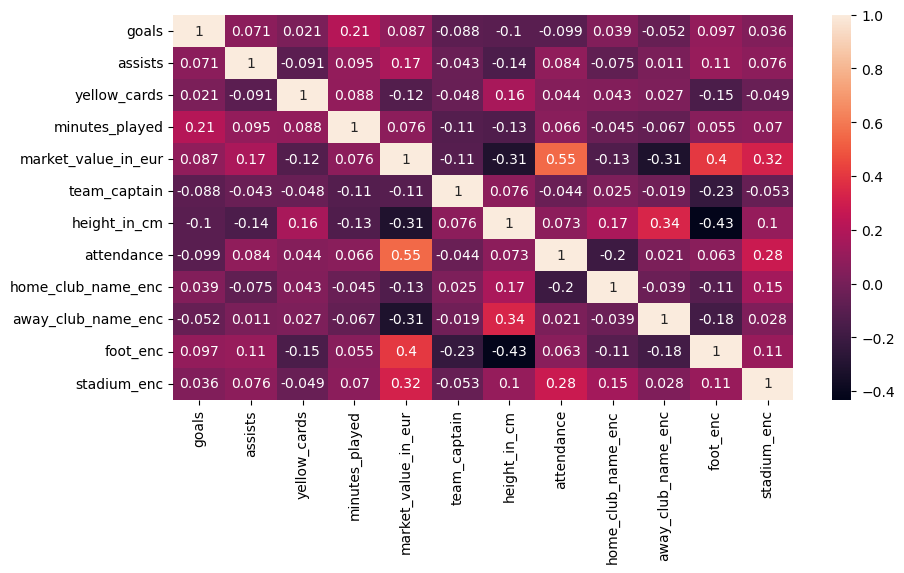

In [83]:
# Feature selection
sns.heatmap(df_scaled.corr(),annot=True)
plt.gcf().set_size_inches(10,5)
plt.show()

In [84]:
# Checking for high co-linearity between independent features
abs(df_scaled.corr())>0.7

,goals,assists,yellow_cards,minutes_played,market_value_in_eur,team_captain,height_in_cm,attendance,home_club_name_enc,away_club_name_enc,foot_enc,stadium_enc
goals,True,False,False,False,False,False,False,False,False,False,False,False
assists,False,True,False,False,False,False,False,False,False,False,False,False
yellow_cards,False,False,True,False,False,False,False,False,False,False,False,False
minutes_played,False,False,False,True,False,False,False,False,False,False,False,False
market_value_in_eur,False,False,False,False,True,False,False,False,False,False,False,False
team_captain,False,False,False,False,False,True,False,False,False,False,False,False
height_in_cm,False,False,False,False,False,False,True,False,False,False,False,False
attendance,False,False,False,False,False,False,False,True,False,False,False,False
home_club_name_enc,False,False,False,False,False,False,False,False,True,False,False,False
away_club_name_enc,False,False,False,False,False,False,False,False,False,True,False,False


In [85]:
abs(df_scaled.corr()[['market_value_in_eur']].sort_values('market_value_in_eur',ascending=False))

,market_value_in_eur
market_value_in_eur,1.000000
attendance,0.548458
foot_enc,0.402838
stadium_enc,0.322407
assists,0.173088
goals,0.086918
minutes_played,0.075691
team_captain,0.109384
yellow_cards,0.122324
home_club_name_enc,0.130925


In [86]:
#Spliting the data
x=np.array(df_scaled['attendance']).reshape(-1,1)
y=np.array(df_scaled['market_value_in_eur']).reshape(-1,1)

In [87]:
df_scaled['attendance'].isnull().sum()

0

In [88]:
x

array([[ 0.51815247],
       [ 0.51815247],
       [ 0.51815247],
       ...,
       [-1.20062633],
       [-1.20062633],
       [-1.20062633]])

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
s1=LinearRegression().fit(x_train,y_train)
y_pred=s1.predict(x_test)
y_pred

array([[-0.26204142],
       [-0.00505978],
       [-0.05487144],
       ...,
       [-0.67998474],
       [ 0.3795572 ],
       [-0.29393105]])

In [90]:
print('Intercept:',s1.intercept_)
print('Slope:',s1.coef_)

Intercept: [-0.00505978]
Slope: [[0.5481321]]


In [ ]:
linear_assumption(s_model,X_test_gr,y_test)

In [53]:
print('MSE:',mean_squared_error(y_test,y_pred)) #Avreage squared distance between the predicted and the actual value
print('MAE:',mean_absolute_error(y_test,y_pred)) # average absolute distance b/w predicted and actual value 
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False)) # Square of MSE
print('r2score:',r2_score(y_test,y_pred)) 

MSE: 0.7035734692348585
MAE: 0.6919279397730209
RMSE: 0.8387928643204224
r2score: 0.29172005857963934


##### The regression model exhibits moderate errors (MSE: 0.70, MAE: 0.69, RMSE: 0.84) and a weak fit (R-squared: 0.29), suggesting room for improvement.

## Multilinear regression

In [72]:
x2=np.array(df_scaled[['attendance',"foot_enc"]]).reshape(-1,2)
y=np.array(df_scaled['market_value_in_eur'])

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=2)
s2=LinearRegression().fit(x_train,y_train)
y_pred=s2.predict(x_test)
y_pred

array([-0.09042184,  0.15424637,  0.10682146, ..., -0.48833913,
       -0.36918073, -1.01039835])

In [74]:
print('Intercept:',s2.intercept_)
print('Slope:',s2.coef_) 

Intercept: -0.0010754528548388882
Slope: [0.521868   0.35956057]


In [75]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('r2score:',r2_score(y_test,y_pred))

MSE: 0.5609226441223629
MAE: 0.5999131131087185
RMSE: 0.7489476911790055
r2score: 0.4353251296522065


Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance
        Actual  Predicted  Residuals
0     1.237435  -0.090422   1.147014
1     1.237435   0.154246   1.083189
2     1.237435   0.106821   1.130614
3    -0.423597  -0.021401   0.402196
4    -0.423597  -0.288651   0.134946
...        ...        ...        ...
1087  1.237435   0.391483   0.845952
1088  1.237435   0.154246   1.083189
1089 -0.995731  -0.488339   0.507391
1090 -0.884995  -0.369181   0.515814
1091 -1.004958  -1.010398  -0.005440

[1092 rows x 3 columns]


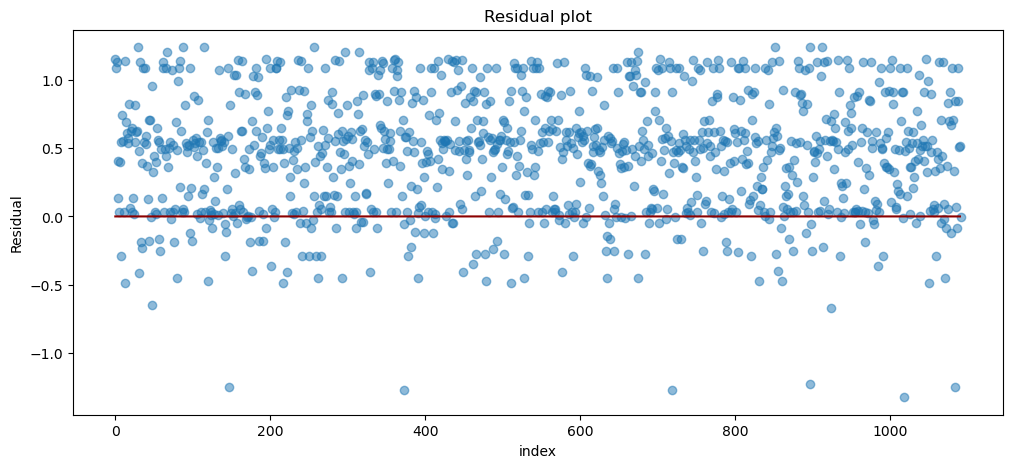

In [76]:
h=homoscedasticity_assumption(s2,x_test,y_test)
h

## iii) three columns


In [59]:
x3=np.array(df_scaled[['attendance',"foot_enc","stadium_enc"]]).reshape(-1,3)
y=np.array(df_scaled['market_value_in_eur'])

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x3,y,test_size=0.3,random_state=1)
s3=LinearRegression().fit(x_train,y_train)
y_pred=s3.predict(x_test)
y_pred

array([ 0.48716673, -0.40211834,  0.75727452, ...,  0.07227138,
       -0.39194992, -0.20485943])

In [61]:
print('Intercept:',s2.intercept_)
print('Slope:',s2.coef_)

Intercept: -0.0010754528548388882
Slope: [0.521868   0.35956057]


In [62]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('r2score:',r2_score(y_test,y_pred))

MSE: 0.5557279656176256
MAE: 0.5996133152358473
RMSE: 0.7454716397138295
r2score: 0.4465451338916193


## iv) Multiple columns

In [63]:
x3=np.array(df_scaled[['attendance',"foot_enc","stadium_enc","assists","goals","away_club_name_enc","home_club_name_enc"]]).reshape(-1,7)
y=np.array(df_scaled['market_value_in_eur'])

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x3,y,test_size=0.3,random_state=1)
s4=LinearRegression().fit(x_train,y_train)
y_pred=s4.predict(x_test)
y_pred

array([ 0.62299113, -0.01070183,  1.06564276, ...,  0.17401192,
       -0.31929754, -0.01082644])

In [65]:
print('Intercept:',s4.intercept_)
print('Slope:',s4.coef_)

Intercept: 0.0024446293501582273
Slope: [ 0.49542071  0.28284424  0.15329034  0.09039542  0.08340457 -0.27723933
 -0.03175031]


In [66]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('r2score:',r2_score(y_test,y_pred))

MSE: 0.47155880673864536
MAE: 0.5548927558556094
RMSE: 0.6867013956143131
r2score: 0.5303700148404279


#### Moderate error: The Mean Squared Error (MSE) is 0.47, and the Root Mean Squared Error (RMSE) is 0.69, suggesting some level of prediction errors. The Mean Absolute Error (MAE) of 0.55 indicates that, on average, predictions are off by about 0.55 units.
Moderate fit: The R-squared score of 0.53 suggests that the model explains about 53% of the variance in the target variable. This indicates a moderate fit to the data, but there's room for improvement.
Overall, the model demonstrates a reasonable level of performance but could benefit from further tuning or feature engineering to reduce errors and improve the fit.

In [67]:
def calculate_residuals(model,features,label):
    prediction=model.predict(features)
    df_result=pd.DataFrame({"Actual":label,"Predicted":prediction})
    df_result["Residuals"]=abs(df_result["Actual"])-abs(df_result["Predicted"])
    return df_result

def linear_assumption(model, features, label):
    print("Assumption 1: Linear relationship between target and actual feature","\n")
    print("Checking with a scatter plot of actual vs predicted.","prediction should follow the diagonal line")

    #calculate residual for plot
    df_result=calculate_residuals(model,features,label)
    #plotting the actual vs predicted value
    sns.lmplot(x="Actual",y="Predicted",data=df_result,fit_reg=False)
    #plotting the diagonal line
    line_coords=np.arange(df_result.min().min(),df_result.max().max())
    plt.plot(line_coords,line_coords,color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

In [68]:
def homoscedasticity_assumption(model, features, label):
   
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    print('Residuals should have relative constant variance')
    #calculating residuals for the plot
    df_result=calculate_residuals(model,features,label)
    print(df_result)
    #plotiing the residuals
    plt.subplots(figsize=(12,5))  
    ax=plt.subplot(111)  # to remove spins   
    plt.scatter(x=df_result.index,y=df_result.Residuals,alpha=0.5) #alpha makes the point a bit see thruh
    plt.plot(np.repeat(0,df_result.index.max()),color="darkred") #draws a horizontal line from start to the max value to check how the residuals are spread
    plt.title("Residual plot")
    plt.xlabel("index")
    plt.ylabel("Residual")

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance
        Actual  Predicted  Residuals
0     0.776038   0.622991   0.153046
1    -1.041870  -0.010702   1.031168
2     1.237435   1.065643   0.171793
3     1.237435   0.671392   0.566043
4    -0.884995  -0.820736   0.064259
...        ...        ...        ...
1087 -0.423597  -0.058308   0.365289
1088 -1.041870  -0.786685   0.255185
1089  1.237435   0.174012   1.063424
1090 -1.041870  -0.319298   0.722573
1091 -0.146758  -0.010826   0.135932

[1092 rows x 3 columns]


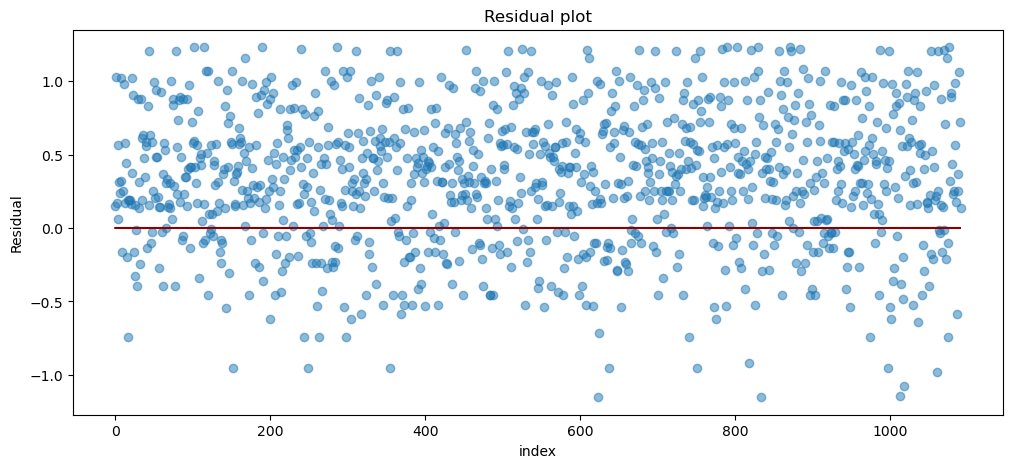

In [69]:
# call the function
h=homoscedasticity_assumption(s4,x_test,y_test)
h

Text(0.5, 1.0, 'Error distribution')

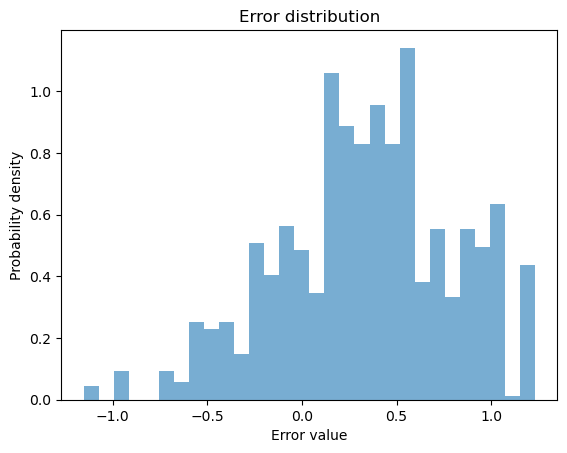

In [70]:
df_result=calculate_residuals(s4,x_test,y_test)
plt.hist(df_result.Residuals,bins=30,label="Error distribution",alpha=0.6,density=True)
plt.xlabel("Error value")
plt.ylabel("Probability density")
plt.title("Error distribution")

### Model has improved from one feature linear regression to multi feature linear regression but there is still room for improvement

y=0.00271+(0.50291023(x1) +  0.28664093(x2) +0.14686561(x3)  + 0.09263802(x4)+ 0.08311928(x5) -0.27551127(x6))

## Sprint 6

## Team comparison

### Business questions

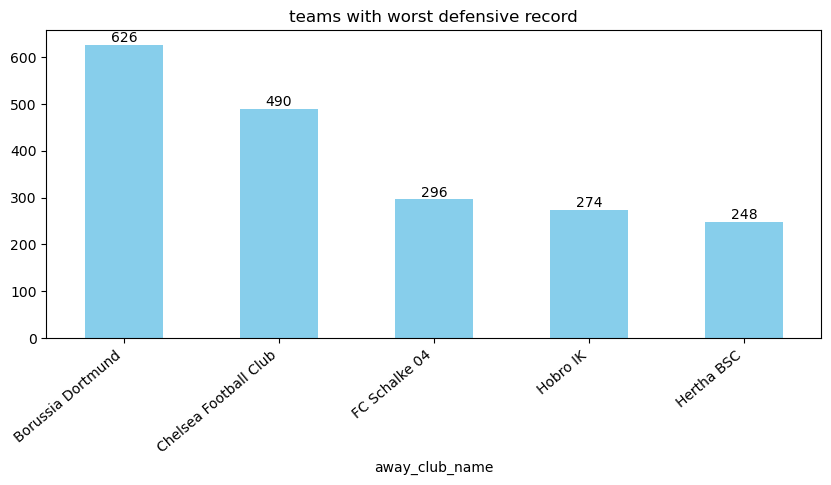

In [105]:
# Which team has the worst defensive record (most goals conceded)?
defensive_record = merged_df.groupby(['away_club_name'])['home_club_goals'].sum().sort_values(ascending=False)
d=defensive_record.head()

plt.figure(figsize=(10, 4))
ax=d.plot(kind='bar', color='skyblue') 
plt.title ("teams with worst defensive record")
plt.xticks(rotation=40, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')


### Which teams score the most goals on average per game, considering both home and away matches? Are there significant differences in scoring ability across teams?


In [ ]:
merged_df.columns

Average Goals per Game:
 Liverpool Football Club                         84.0
Burnley Football Club                           84.0
Arsenal Football Club                           63.0
AFC Ajax Amsterdam                              59.5
Football Club Nords                             55.9
                                                ... 
Hamilton Academical FC                           0.0
Stade brestois 29                                0.0
Eintracht Braunschweig                           0.0
ADO Den Haag                                     0.0
Association sportive de Monaco Football Club     0.0
Length: 148, dtype: float64


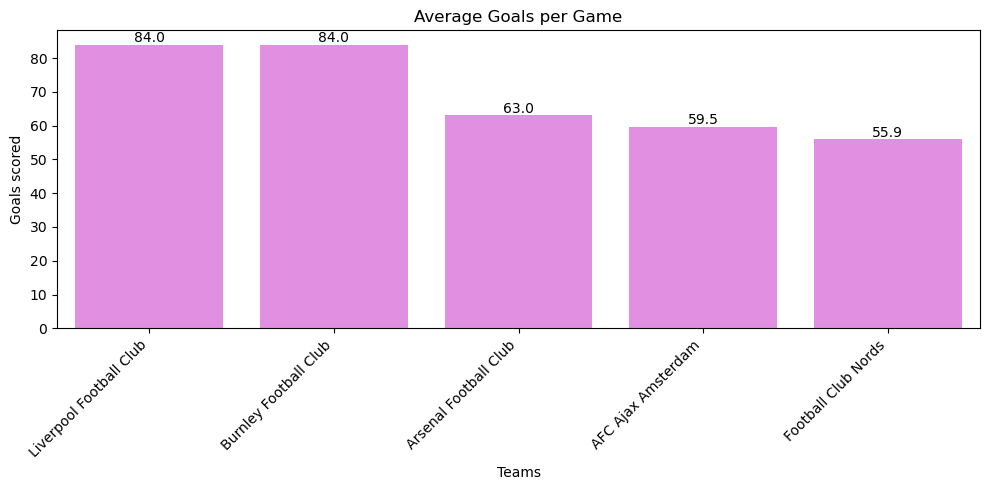

In [194]:
# Calculate games played and total goals
games_played = pd.concat([
    merged_df.groupby('home_club_name')['game_id_x'].nunique(),
    merged_df.groupby('away_club_name')['game_id_x'].nunique()
], axis=1, keys=['Home', 'Away']).fillna(0).sum(axis=1)

goals_scored = pd.concat([merged_df.groupby('home_club_name')['home_club_goals'].sum(),
    merged_df.groupby('away_club_name')['away_club_goals'].sum()
], axis=1).fillna(0).sum(axis=1)
avg_goals = goals_scored / games_played
avg_goals
most_scoring = avg_goals.sort_values(ascending=False)
print("Average Goals per Game:\n", most_scoring)
most_scoring=most_scoring.head()
# Visualize
plt.figure(figsize=(10, 5))
ax=sns.barplot(x=most_scoring.index, y=most_scoring,color='violet')
plt.title('Average Goals per Game')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.xlabel("Teams")
plt.ylabel("Goals scored")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Which team has the highest average number of assists per game?

Average assist per Game:
 Naomes Olympique                                   36.0
F.C. Copenhagen                                    17.0
Randers Fodbold Club                               17.0
Sport Lisboa e Benfica                             14.0
Norwich City                                       14.0
                                                   ... 
KSC Lokeren (- 2020)                                0.0
Hertha BSC                                          0.0
Heracles Almelo                                     0.0
Hannover 96                                         0.0
tsg 1899 hoffenheim football spielbetriebs Gmbh     0.0
Length: 148, dtype: float64


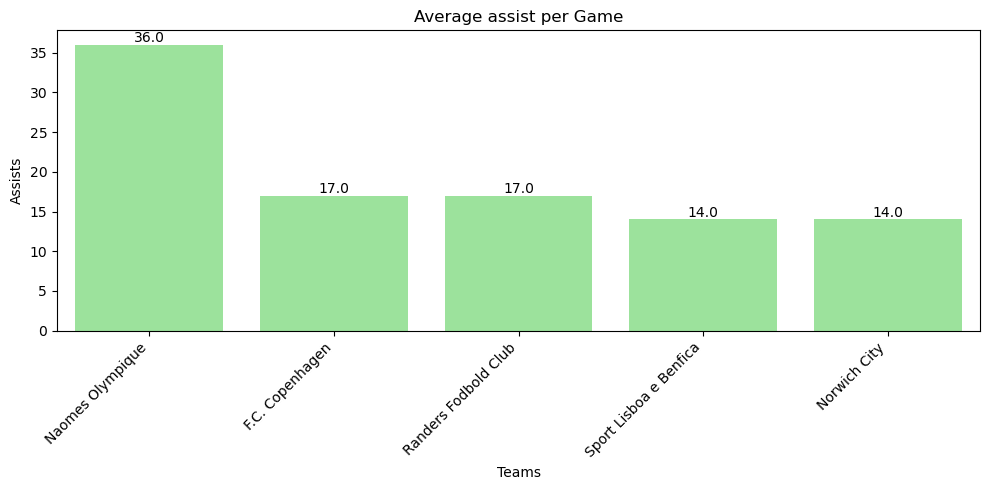

In [107]:

games_played = pd.concat([
    merged_df.groupby('home_club_name')['game_id_x'].nunique(),
    merged_df.groupby('away_club_name')['game_id_x'].nunique()
], axis=1, keys=['Home', 'Away']).fillna(0).sum(axis=1)

goals_scored = pd.concat([
    merged_df.groupby('home_club_name')['assists'].sum(),
    merged_df.groupby('away_club_name')['assists'].sum()
], axis=1).fillna(0).sum(axis=1)
avg_goals = goals_scored / games_played
avg_goals
most_scoring = avg_goals.sort_values(ascending=False)
print("Average assist per Game:\n", most_scoring)
most_scoring=most_scoring.head()                             
# Visualize
plt.figure(figsize=(10, 5))
ax=sns.barplot(x=most_scoring.index, y=most_scoring,color='lightgreen')
plt.title('Average assist per Game')
plt.xlabel("Teams")
plt.ylabel("Assists")
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

## Hypothesis testing

### Is there a significant difference between the average number of goals scored in 2018 and 2019 by Team Borussia Dortmund in their Home ground?

In [ ]:
Set Hypothesis
H0: There is no significant difference between the average number of goals scored in 2018 and 2019 by Team Borussia Dortmund in their Home ground
H1: There is significant difference between the average number of goals scored in 2018 and 2019 by Team Borussia Dortmund in their Home ground
H0: mu1 = mu2 --> mu1-mu2 = 0
H1: mu1 != mu2 --> mu1-mu2 != 0
Two tail test
Z test since both sata set has size above 30
# set alpha
alpha = 0.05

In [109]:
d1= merged_df[(merged_df['home_club_name'] == 'Borussia Dortmund') & (merged_df['season'] == 2018)] 
d2 = merged_df[(merged_df['home_club_name'] == 'Borussia Dortmund') & (merged_df['season'] == 2019)]
alpha = 0.05

In [110]:
print('The goals data in 2018 by the team:')
print('Mean:',d1['home_club_goals'].mean())
print('Variance:',(st.stdev(d1['home_club_goals'])**2))
print('n1:',len(d1))

The goals data in 2018 by the team:
Mean: 2.5757575757575757
Variance: 2.4896526237989653
n1: 165


In [111]:
print('The goals data in 2019 by the team:')
print('Mean:',d2['home_club_goals'].mean())
print('Variance:',(st.stdev(d2['home_club_goals'])**2))
print('n2:',len(d2))

The goals data in 2019 by the team:
Mean: 1.98
Variance: 1.734285714285714
n2: 50


In [112]:
import math as m
z_stat2=(d1['home_club_goals'].mean()-d2['home_club_goals'].mean())/m.sqrt(((st.stdev(d1['home_club_goals'])**2)/len(d1))+((st.stdev(d2['home_club_goals'])**2)/len(d2)))
p_value2z=norm.sf(abs(z_stat2))*2
z_crit2=norm.ppf(1-alpha/2)
print('Z statistics for 2 tail Z test:',z_stat2)
print('p value for 2 tail Z test:', p_value2z)
print('Z critical for 2 tail Z test:',z_crit2)

Z statistics for 2 tail Z test: 2.6703368057007455
p value for 2 tail Z test: 0.00757751962457375
Z critical for 2 tail Z test: 1.959963984540054


In [ ]:
Statistical conclusion:
p value < alpha; 0.007 < 0.05
z statistics 2.802 lies beyond z critical; 2.802 > 1.9599

Conclusion:
Reject null hypothesis
There is significant difference between the average number of goals scored in 2018 and 2019 by Team Borussia Dortmund in their Home ground

## Sprint 7

### Attendance and stadium analysis

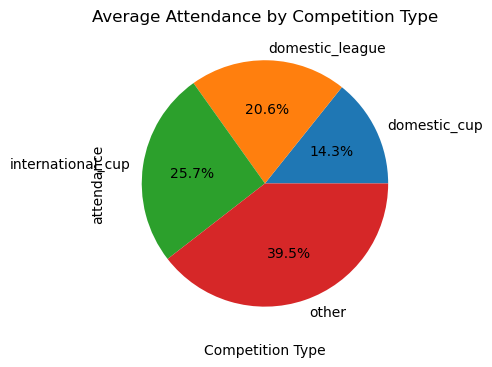

In [113]:
# 5. Attendance across different match types
match_type_attendance = merged_df.groupby('competition_type')['attendance'].mean()
plt.figure(figsize=(6, 4))
match_type_attendance.sort_values().plot(kind='pie', color='purple',autopct='%1.1f%%')
plt.title('Average Attendance by Competition Type')
plt.xlabel('Competition Type')
#plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.show()

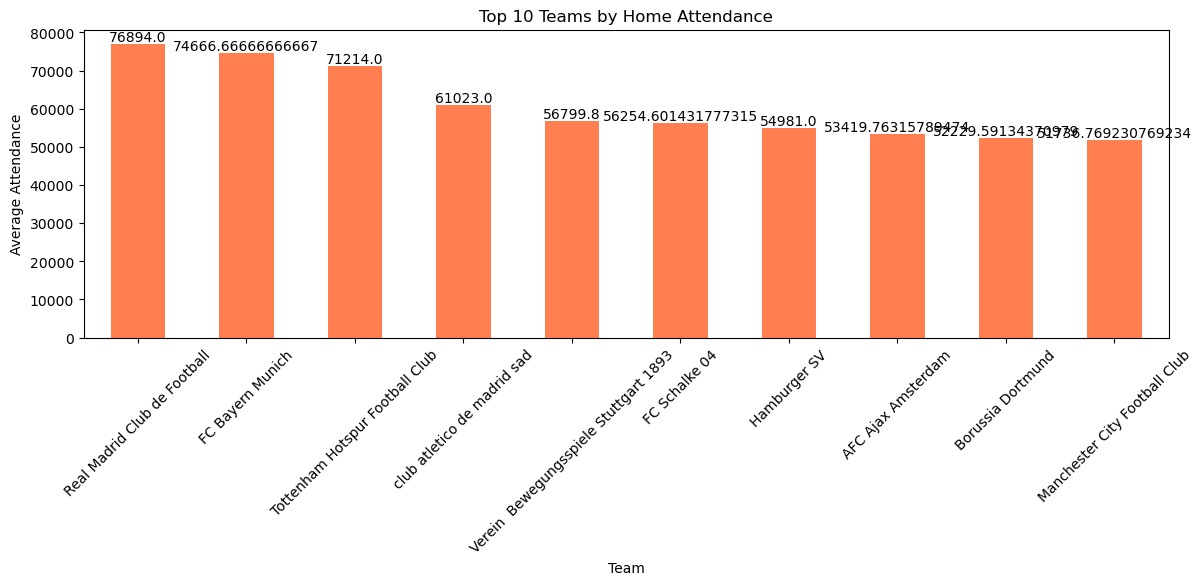

In [114]:
# 3. Attendance variation: Home vs Away
home_away = merged_df.groupby('home_club_name')['attendance'].mean()
plt.figure(figsize=(14, 4))
ax=home_away.sort_values(ascending=False).head(10).plot(kind='bar', color='coral',)
plt.title('Top 10 Teams by Home Attendance')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.xlabel('Team')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.show()

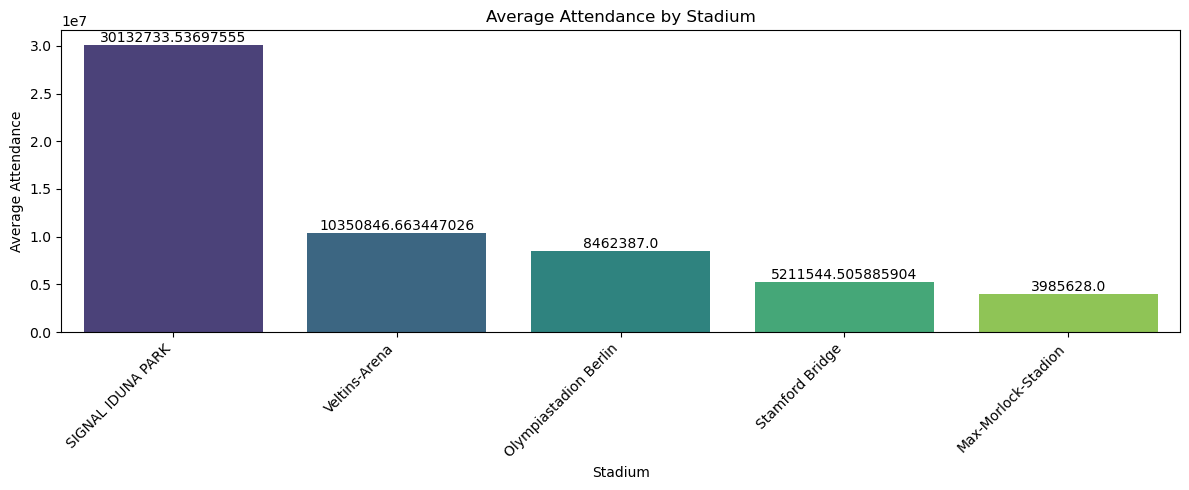

In [115]:
# Top 5 stadiums with high average attendance
average_attendance_by_stadium = merged_df.groupby('stadium')['attendance'].sum().sort_values(ascending=False)
average_attendance_by_stadium=average_attendance_by_stadium.head()
plt.figure(figsize=(12, 5))  # Adjust figure size for better readability
ax=sns.barplot(x=average_attendance_by_stadium.index, y=average_attendance_by_stadium,palette='viridis')
plt.title('Average Attendance by Stadium')
plt.xlabel('Stadium')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

### KNN Model

#### can we predict a player's position using K-Nearest Neighbors (KNN) classification based on their attributes?

In [32]:
merged_df.columns
merged_df["position_x"].value_counts()

position_x
Right Winger          1496
Centre-Back            453
Centre-Forward         403
Right Midfield         311
Left Winger            309
Right-Back             271
Central Midfield       177
Attacking Midfield     100
Left-Back               89
Defensive Midfield      28
Name: count, dtype: int64

In [33]:
kdf=merged_df

In [34]:
kdf.loc[kdf['position_x'].isin(["Right Winger","Left Winger","Centre-Forward"]), 'position_xtar'] = 0

In [36]:
kdf.loc[kdf['position_x'].isin(["Right Midfield","Central Midfield","Attacking Midfield","Defensive Midfield"]), 'position_xtar'] = 1
kdf.loc[kdf['position_x'].isin(["Centre-Back","Right-Back","Left-Back"]), 'position_xtar'] = 2

In [37]:
kdf['position_xtar'].value_counts()

position_xtar
0.0    2208
2.0     813
1.0     616
Name: count, dtype: int64

In [47]:
kdf['position_xtar']=kdf['position_xtar'].astype("int64")
d=kdf[['position_xtar']]
d

,position_xtar
0,2
1,2
2,2
3,2
4,2
...,...
3632,0
3633,0
3634,0
3635,0


In [92]:
knn_data = kdf[['goals','minutes_played','assists','market_value_in_eur','competition_type']]
knn_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   goals                3637 non-null   int64  
 1   minutes_played       3637 non-null   int64  
 2   assists              3637 non-null   int64  
 3   market_value_in_eur  3637 non-null   float64
 4   competition_type     3637 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 142.2+ KB


In [93]:
cat=knn_data.select_dtypes(include='object')
for col in cat.columns:
    label_encod=preprocessing.LabelEncoder()
    knn_data[col+'_enc']=label_encod.fit_transform(knn_data[col])
col_drop=knn_data.select_dtypes(include='object')
knn_data=knn_data.drop(col_drop,axis=1)
knn_data

,goals,minutes_played,assists,market_value_in_eur,competition_type_enc
0,0,70,0,700000.0,1
1,0,70,0,700000.0,1
2,0,70,0,700000.0,1
3,0,70,0,700000.0,1
4,0,70,0,700000.0,1
...,...,...,...,...,...
3632,1,77,0,300000.0,1
3633,1,77,0,300000.0,1
3634,1,77,0,300000.0,1
3635,1,77,0,300000.0,1


In [94]:
#Scaling the data
col=knn_data.columns
Scaler = StandardScaler()
Knn_scaled = Scaler.fit_transform(knn_data)
Knn_scaled = pd.DataFrame(Knn_scaled,columns=col)
Knn_scaled

,goals,minutes_played,assists,market_value_in_eur,competition_type_enc
0,-0.787909,-0.000445,-0.384674,-1.004958,-0.014365
1,-0.787909,-0.000445,-0.384674,-1.004958,-0.014365
2,-0.787909,-0.000445,-0.384674,-1.004958,-0.014365
3,-0.787909,-0.000445,-0.384674,-1.004958,-0.014365
4,-0.787909,-0.000445,-0.384674,-1.004958,-0.014365
...,...,...,...,...,...
3632,0.844925,0.333041,-0.384674,-1.041870,-0.014365
3633,0.844925,0.333041,-0.384674,-1.041870,-0.014365
3634,0.844925,0.333041,-0.384674,-1.041870,-0.014365
3635,0.844925,0.333041,-0.384674,-1.041870,-0.014365


In [95]:
Knn_scaled = pd.concat([Knn_scaled,d],axis=1)
Knn_scaled

,goals,minutes_played,assists,market_value_in_eur,competition_type_enc,position_xtar
0,-0.787909,-0.000445,-0.384674,-1.004958,-0.014365,2
1,-0.787909,-0.000445,-0.384674,-1.004958,-0.014365,2
2,-0.787909,-0.000445,-0.384674,-1.004958,-0.014365,2
3,-0.787909,-0.000445,-0.384674,-1.004958,-0.014365,2
4,-0.787909,-0.000445,-0.384674,-1.004958,-0.014365,2
...,...,...,...,...,...,...
3632,0.844925,0.333041,-0.384674,-1.041870,-0.014365,0
3633,0.844925,0.333041,-0.384674,-1.041870,-0.014365,0
3634,0.844925,0.333041,-0.384674,-1.041870,-0.014365,0
3635,0.844925,0.333041,-0.384674,-1.041870,-0.014365,0


In [96]:
x=Knn_scaled.drop("position_xtar",axis=1)

y_knn = Knn_scaled['position_xtar']



In [97]:
X_train,X_test,y_train,y_test = train_test_split(x,y_knn,train_size=.3,shuffle=True,random_state=2)

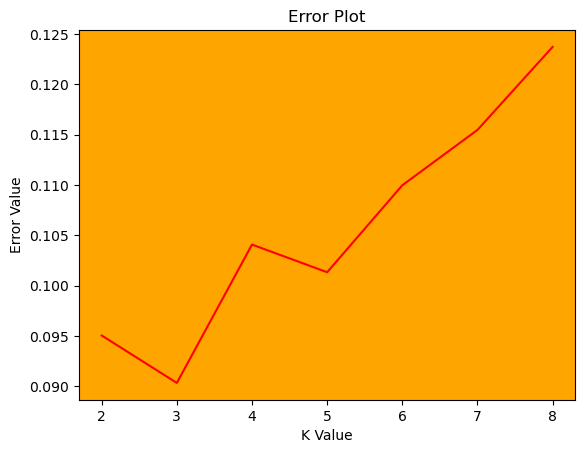

In [98]:
error_rate=[]
for i in range(2,9):
    cls_food=neighbors.KNeighborsClassifier(n_neighbors=i)
    cls_food.fit(X_train,y_train)
    predictions=cls_food.predict(X_test)
    error_rate.append(np.mean(predictions!=y_test))
plt.plot(range(2,9),error_rate,color="red")
plt.title("Error Plot")
plt.xlabel("K Value")
plt.ylabel("Error Value")
plt.gca().set_facecolor("orange")
plt.show()

In [99]:
k = 3
attend_clf = neighbors.KNeighborsClassifier(k)
attend_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [100]:
print(attend_clf.classes_)
print(attend_clf.n_neighbors)

[0 1 2]
3


In [101]:
predict_k = attend_clf.predict(X_test)
predict_k

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [102]:
# Model Evaluation
print("Recall Score :",recall_score(y_test,predict_k,average='macro'))#consider each classes equally regardless of the size of the class
print("F1-Score :",f1_score(y_test,predict_k,average='macro'))
print("Precision Score :",precision_score(y_test,predict_k,average='macro'))
print("Accuracy Score :",accuracy_score(y_test,predict_k))

Recall Score : 0.8868272166272805
F1-Score : 0.8927089849652625
Precision Score : 0.8989401788596264
Accuracy Score : 0.9096622152395916


In [103]:
# ROC Score
from sklearn.metrics import roc_auc_score as r
y_pred=attend_clf.predict_proba(X_test)
roc=r(y_test,y_pred,multi_class="ovr",average='macro')
roc

0.9550775067165507

In [ ]:
The model achieved good performance with ~90% precision, recall, F1-score, and accuracy, and excellent class separation with a 95% ROC AUC score.

## Sprint 8 

#### Refree analysis
Performed in tableau

## Substution analysis

In [135]:
substitutions = merged_df[merged_df['type_x'].isin(['Substitutions','sub'])]

In [136]:
substitutions

,appearance_id,game_id_x,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,contract_year,competition_type_enc
0,2231426_49723,2231426,49723,2012-09-21,Timothy Chandler,L1,0,0,0,0,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,2025,1
1,2231426_49723,2231426,49723,2012-09-21,Timothy Chandler,L1,0,0,0,0,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,2025,1
2,2231426_49723,2231426,49723,2012-09-21,Timothy Chandler,L1,0,0,0,0,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,2025,1
3,2231426_49723,2231426,49723,2012-09-21,Timothy Chandler,L1,0,0,0,0,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,2025,1
4,2231426_49723,2231426,49723,2012-09-21,Timothy Chandler,L1,0,0,0,0,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,2025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,2026,1
3633,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,2026,1
3634,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,2026,1
3635,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,2026,1


In [137]:
games_with_subs = substitutions['game_id_x'].unique()

In [138]:
df=merged_df


In [139]:
df['has_substitution'] = df['game_id_x'].isin(games_with_subs)

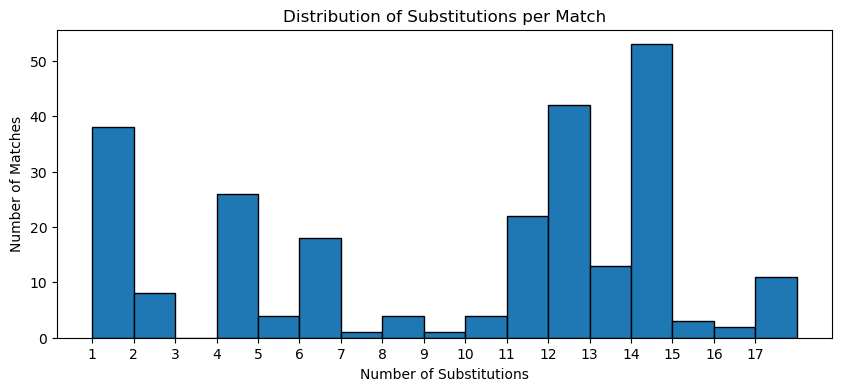

In [140]:
# distribution of substitutions per match 
subs_per_match = substitutions.groupby('game_id_x').size()
plt.figure(figsize=(10, 4))
subs_per_match.plot(kind='hist', bins=range(1, subs_per_match.max() + 2), edgecolor='black') # Integer bins for count data
plt.title('Distribution of Substitutions per Match')
plt.xlabel('Number of Substitutions')
plt.ylabel('Number of Matches')
plt.xticks(range(1, subs_per_match.max() + 1)) # Ensure integer ticks
plt.show()

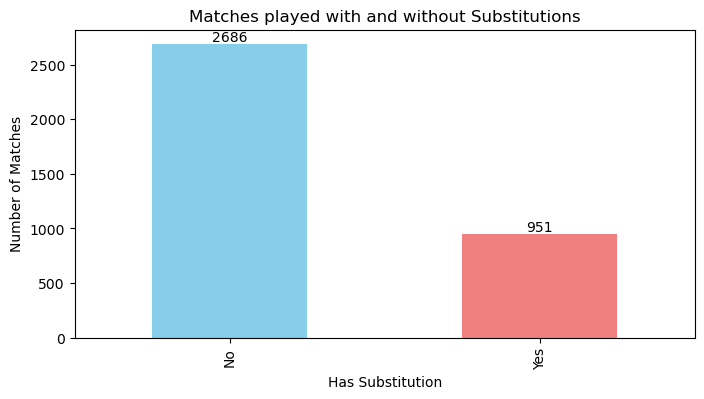

In [141]:
#b) Matches with and without Substitutions:
match_counts = merged_df['has_substitution'].value_counts()

plt.figure(figsize=(8, 4))
ax=match_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Matches played with and without Substitutions')
plt.xlabel('Has Substitution')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.ylabel('Number of Matches')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [142]:
#Calculate total goals scored in matches with and without substitutions
goals_with_subs = df[df['has_substitution']]['home_club_goals'].sum() + df[df['has_substitution']]['away_club_goals'].sum()
goals_without_subs = df[~df['has_substitution']]['home_club_goals'].sum() + df[~df['has_substitution']]['away_club_goals'].sum()


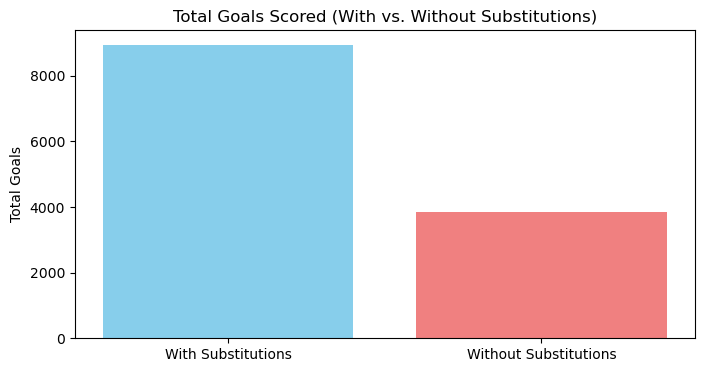

In [143]:
plt.figure(figsize=(8, 4))
goal_data = {'With Substitutions': goals_with_subs, 'Without Substitutions': goals_without_subs}
ax=plt.bar(goal_data.keys(), goal_data.values(), color=['skyblue', 'lightcoral'])
plt.title('Total Goals Scored (With vs. Without Substitutions)')
plt.ylabel('Total Goals')
plt.show()

In [144]:
# b) Calculate average goals scored per match with and without substitutions
matches_with_subs_count = df['has_substitution'].sum()
matches_without_subs_count = len(df) - matches_with_subs_count

avg_goals_with_subs = goals_with_subs / matches_with_subs_count if matches_with_subs_count > 0 else 0
avg_goals_without_subs = goals_without_subs / matches_without_subs_count if matches_without_subs_count > 0 else 0

print(f"Average goals scored per match with substitutions: {avg_goals_with_subs:.2f}")
print(f"Average goals scored per match without substitutions: {avg_goals_without_subs:.2f}")


Average goals scored per match with substitutions: 3.33
Average goals scored per match without substitutions: 4.05


### Sprint 9

# Event analysis

##### Is there a significant difference in the average number of goals scored by players of different preferred food? Select 25 random samples of average number of goals scored by players from the given data. use 5% significant level for the test and use z test

In [ ]:
H₀ (Null Hypothesis): There is no significant difference in the average number of goals scored by players with different preferred feet. (The mean goals for left-footed and right-footed players are equal.)

H₁ (Alternative Hypothesis): There is a significant difference in the average number of goals scored by players with different preferred feet. (The mean goals for left-footed and right-footed players are not equal.)

In [195]:
data2= merged_df[merged_df['foot'] =='left']
data2=data2.head(25)
data1= merged_df[merged_df['foot'] == 'right']
data1=data1.head(25)

In [196]:
mean2z_a=data1['home_club_goals'].mean()
std2z_a=st.stdev(data1['home_club_goals'])
var2z_a=std2z_a**2
n2z_a=len(data1)

In [197]:
mean2z_b=data2['home_club_goals'].mean()
std2z_b=st.stdev(data2['home_club_goals'])
var2z_b=std2z_b**2
n2z_b=len(data2)

In [148]:
# set alpha
alpha2z = 0.05

In [149]:
s_p = sqrt(((n2z_a - 1) * std2z_a**2 + (n2z_b - 1) * std2z_a**2) / (n2z_a + n2z_b - 2))

In [150]:
print('The goals data of right foot player goals:')
print('Mean:',mean2z_a)
print('Variance:',var2z_a)
print('n1:',n2z_a)
print("                                             ")
print('The goals data of left foot player goals:')
print('Mean:',mean2z_b)
print('Variance:',var2z_b)
print('n2:',n2z_b)

The goals data of right foot player goals:
Mean: 2.2
Variance: 1.7500000000000002
n1: 25
                                             
The goals data of left foot player goals:
Mean: 3.6
Variance: 6.499999999999999
n2: 25


In [151]:
t_stat2=(mean2z_a-mean2z_b)/s_p* sqrt(1/n2z_a + 1/n2z_b)
p_value2z=norm.sf(abs(t_stat2))*2
t_crit2=norm.ppf(1-alpha2z/2)
print('t statistics for 2 tail t test:',t_stat2)
print('p value for 2 tail t test:', p_value2z)
print('t critical for 2 tail t test:',t_crit2)

t statistics for 2 tail t test: -0.2993325909419153
p value for 2 tail t test: 0.7646862899180872
t critical for 2 tail t test: 1.959963984540054


In [ ]:
Statistical conclusion:
p value > alpha; 0.76 > 0.05
t statistics 2.85 lies beyond t critical; 2.80 > 1.9599

Conclusion:
Accept null hypothesis
There is no significant difference in the average number of goals scored by players with different preferred feet. (The mean goals for left-footed and right-footed players are equal.)

In [152]:
#Show the goal distribution across first and second half
def get_half(minutes):
    if minutes <= 45:
        return "0-45"
    else:
        return "45-90"

merged_df['half'] = merged_df['minute'].apply(get_half)

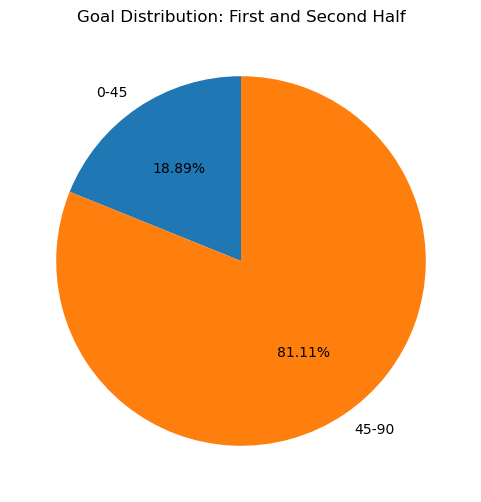

In [153]:
goal_distribution = merged_df.groupby('half').size().reset_index(name='count')
goal_distribution['percentage'] = (goal_distribution['count'] / goal_distribution['count'].sum()) * 100
plt.figure(figsize=(6, 6))
plt.pie(goal_distribution['count'], labels=goal_distribution['half'], autopct='%1.2f%%', startangle=90)
plt.title("Goal Distribution: First and Second Half")
plt.show()

In [ ]:
merged_df.columns

## Competition analysis

In [ ]:
## Which teams have consistently scored well across different seasons?

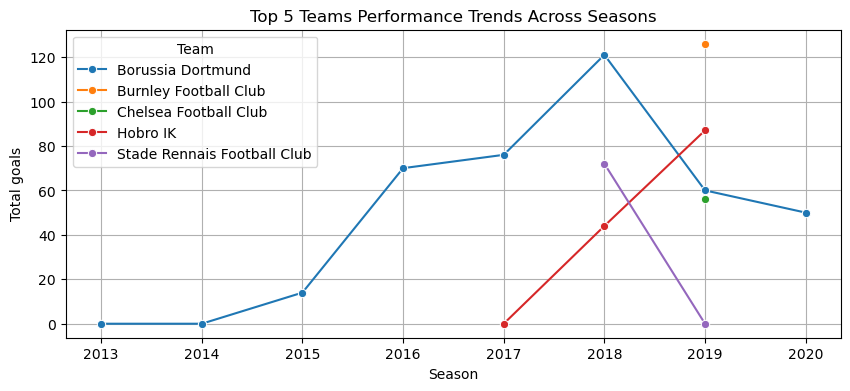

In [154]:
team_season_perf = merged_df.groupby(['home_club_name', 'season'])['goals'].sum().reset_index()
top_teams = team_season_perf.groupby('home_club_name')['goals'].mean().sort_values(ascending=False).head(5).index
top_teams_perf = team_season_perf[team_season_perf['home_club_name'].isin(top_teams)]

plt.figure(figsize=(10, 4))
sns.lineplot(data=top_teams_perf, x='season', y='goals', hue='home_club_name', marker='o')
plt.title('Top 5 Teams Performance Trends Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total goals')
plt.legend(title='Team')
plt.grid(True)
plt.show()

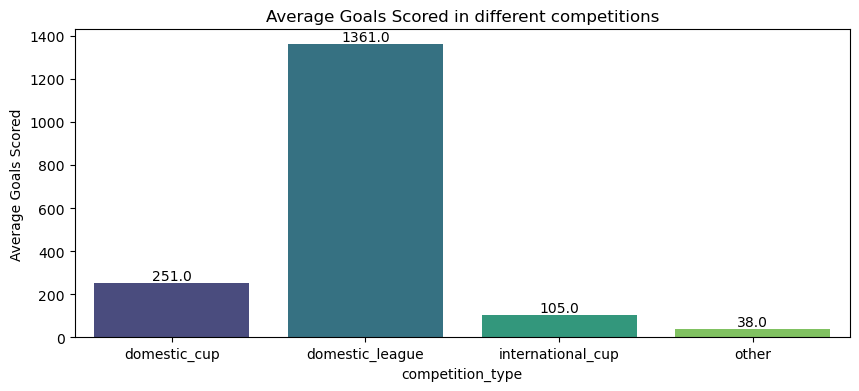

In [155]:
# 1. Goal Scoring Comparison Across Leagues
goals_by_league = merged_df.groupby('competition_type')['goals'].sum().reset_index()

total_goals = goals_by_league['goals'].sum()

goals_by_league['percentage'] = (goals_by_league['goals'] / total_goals) * 100

plt.figure(figsize=(10, 4))
ax = sns.barplot(x='competition_type', y='goals', data=goals_by_league, palette='viridis')
plt.title('Average Goals Scored in different competitions')
plt.ylabel('Average Goals Scored')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

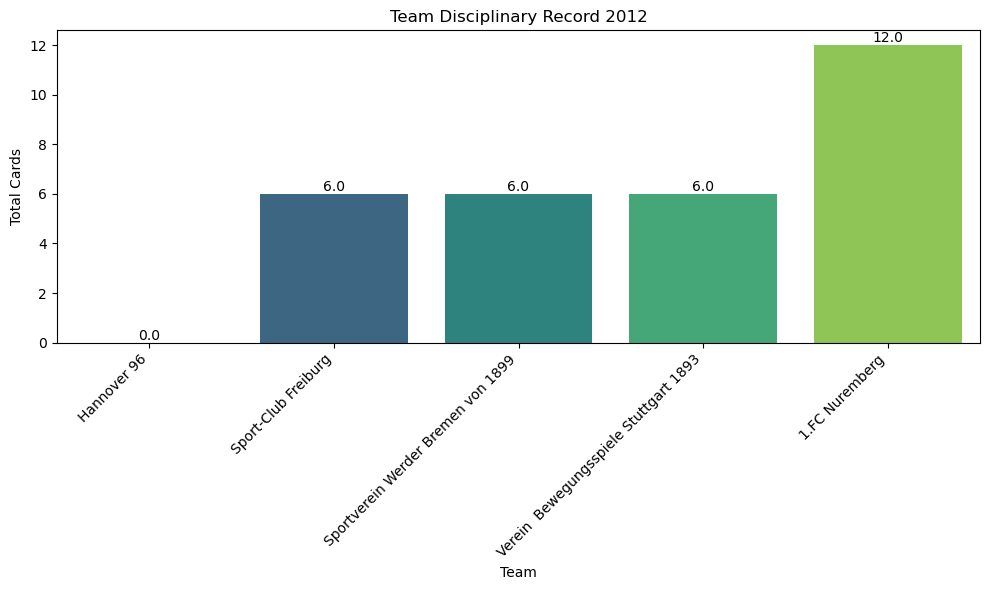

In [156]:
#What is the team disciplinary record for 2012
df_season = merged_df[merged_df['season'] == 2012]
df_season['total_cards'] = df_season['yellow_cards'] + df_season['red_cards']
team_discipline = df_season.groupby('home_club_name')['total_cards'].sum().sort_values()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=team_discipline.index, y=team_discipline.values, color='yellow', palette='viridis')
plt.title(f'Team Disciplinary Record 2012')
plt.xlabel('Team')
plt.ylabel('Total Cards')
plt.xticks(rotation=45, ha='right')

# Add total cards labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

### Player Attributes and Demographics
#### Kmeans clustering

In [ ]:


Can we group football players into distinct clusters based on their goal-scoring ability and the amount of playing time they receive?

In [209]:
merged_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y',
       'number', 'team_captain', 'position_x', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'position_y', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

In [210]:
a=merged_df[['goals', 'minutes_played']]
a

,goals,minutes_played
0,0,70
1,0,70
2,0,70
3,0,70
4,0,70
...,...,...
3632,1,77
3633,1,77
3634,1,77
3635,1,77


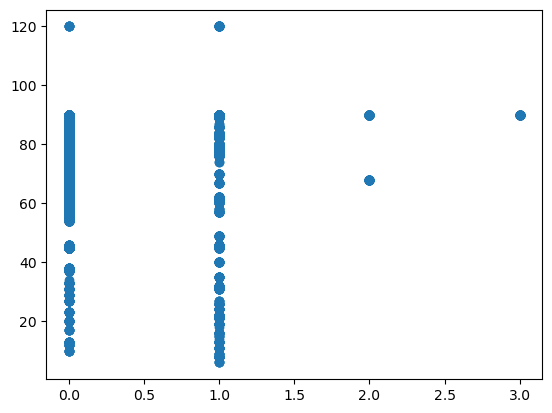

In [211]:
plt.scatter(a['goals'],a['minutes_played'])

In [212]:
scale=StandardScaler()
df_scaled=scale.fit_transform(a)
df_scaled=pd.DataFrame(df_scaled,columns=a.columns)
df_scaled

,goals,minutes_played
0,-0.787909,-0.000445
1,-0.787909,-0.000445
2,-0.787909,-0.000445
3,-0.787909,-0.000445
4,-0.787909,-0.000445
...,...,...
3632,0.844925,0.333041
3633,0.844925,0.333041
3634,0.844925,0.333041
3635,0.844925,0.333041


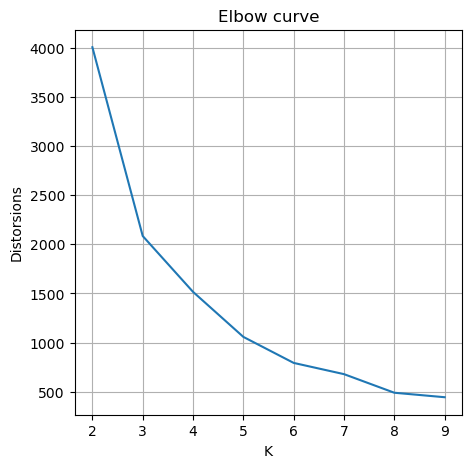

In [213]:
from sklearn.cluster import KMeans
Distorsions =[]
for k in range(2,10):
    KMeans_model=KMeans(n_clusters=k)
    KMeans_model.fit(df_scaled)
    Distorsions.append(KMeans_model.inertia_)
plt.figure(figsize=(5,5))   
plt.plot(range(2,10),Distorsions)

plt.xlabel("K")
plt.grid(True)
plt.ylabel("Distorsions")
plt.title("Elbow curve")
plt.show()

For n=clusters= 2 Avreage silhoutte score= 0.5233448398955868
For n=clusters= 3 Avreage silhoutte score= 0.6026739721067843
For n=clusters= 4 Avreage silhoutte score= 0.5913317798974221
For n=clusters= 5 Avreage silhoutte score= 0.5702084739287899
For n=clusters= 6 Avreage silhoutte score= 0.6132831964566133
For n=clusters= 7 Avreage silhoutte score= 0.6234108592385309
For n=clusters= 8 Avreage silhoutte score= 0.6360324125037505


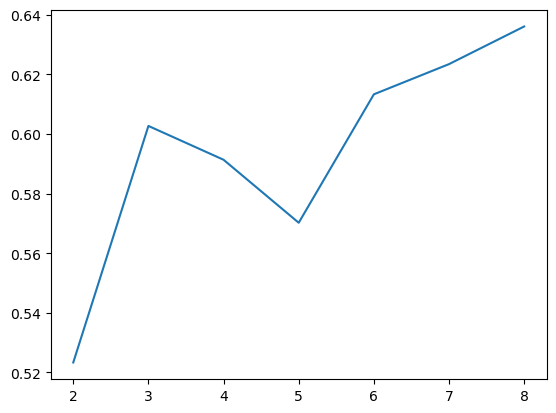

In [214]:
from sklearn.metrics import silhouette_score
sil_score=[]
for i in range(2,9):
    sil_score.append(silhouette_score(df_scaled,KMeans(n_clusters=i,random_state=10).fit_predict(df_scaled)))
    silhoute_avg=silhouette_score(df_scaled,KMeans(n_clusters=i,random_state=10).fit_predict(df_scaled))
    print("For n=clusters=",i,"Avreage silhoutte score=",silhoute_avg)
plt.plot(range(2,9),sil_score)
plt.show()

In [223]:
KMean_model=KMeans(n_clusters=5,random_state=200)
KMean_model.fit(df_scaled)
KMean_centroid=KMean_model.cluster_centers_
print(KMean_centroid)
labels=KMean_model.labels_    
labels
from sklearn.metrics import davies_bouldin_score
davies_score=davies_bouldin_score(df_scaled,labels)

[[ 0.84492524 -1.82305233]
 [-0.7879085   0.27634077]
 [ 0.84492524  0.7169043 ]
 [-0.7879085  -1.21300705]
 [ 2.95400217  0.69034688]]


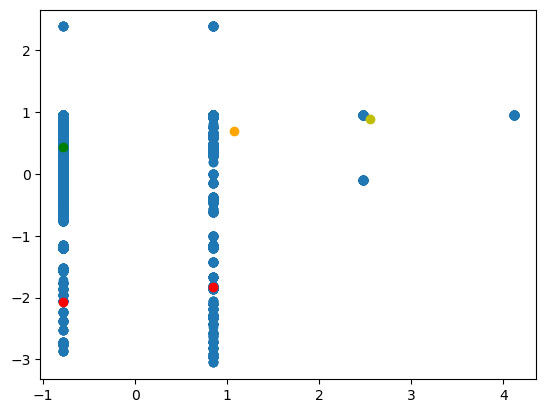

In [224]:

plt.scatter(df_scaled['goals'],df_scaled['minutes_played'])

plt.scatter(0.84492524 ,-1.82305233,color='r')
plt.scatter(-0.7879085 ,  0.42569151,color='green')
plt.scatter(1.07108938  ,0.68497524,color='orange')
plt.scatter(2.55400217 , 0.89034688,color='y')
plt.scatter(-0.7879085  ,-2.07947549,color='r')
plt.show()

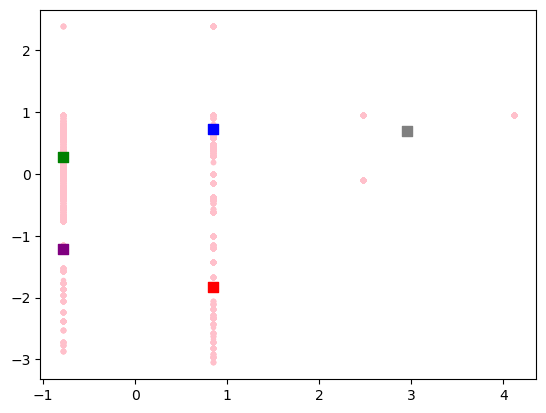

In [225]:
centroid_colors = ['red','green','blue','purple','gray','black']
c=0
plt.scatter(df_scaled['goals'],df_scaled['minutes_played'],marker='.',c='pink')

for i,j in KMean_centroid:
    plt.scatter(i,j,s=50,c=centroid_colors[c],marker='s')
    c=c+1
plt.show()

In [226]:
labels 

array([1, 1, 1, ..., 2, 2, 2])

In [227]:
print("davies bouldin score",davies_score)

davies bouldin score 0.5921035234005918


### davies_score
- This score measures the average similarity between each cluster and its most similar cluster.
- Lower values indicate better-defined clusters
- A score of 0.5921 is relatively low, suggesting that the clusters are well-separated and do not overlap significantly

In [163]:
calinski_score=calinski_harabasz_score(df_scaled,labels)
calinski_score

5939.062074371445

#### calinski Harabasz Score 
- This score also suggests good cluster separation and high intra-cluster compactness.
- Higher values indicate better-defined clusters.
- A score of 5939 is quite high, suggesting that the clusters are well-separated and internally cohesive.